In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
# sns.set_style('white')
# sns.set_context('talk')
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
# import seaborn.timeseries

from IPython.display import display

# for network plots:
import plotly.offline as py
import plotly.graph_objects as go
import networkx as nx
import re # for string split based on multiple characters

This file contains the final code. 

More explanation about the intermediate steps of the data cleaning can be found in the file FINAL_network of infections data_inlezen combineren afbeelden.

# Run from here:

1. Depending on the laptop, select the right line of code:
2. The network folders that end with 'infection networks' are complete and read in. The incomplete folders end with 'infection' and are therefore not read.
3. The list of correct folders is printed as result.

In [2]:
# os.chdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs')
os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)')

In [6]:
folders = []
# for x in os.listdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs'):
for x in os.listdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)'):
    if x.endswith("infection networks"):
        folders.append(x)
print(len(folders))
folders

10


['01. Mobility policies - infection networks',
 '02. Compliance 90% - infection networks',
 '03. Queue-distance 1.5m - infection networks',
 '04. Queue-distance 0.5m - infection networks',
 '05. Plot-size 25m - infection networks',
 '06. Factor-asymptomatic 2 - infection networks',
 '07. Mask-effect 50% - infection networks',
 '08. Compliance 80% - infection networks',
 '09. 20% elderly - mobility policies - infection networks',
 '10. 20% elderly - 1.5m queuedistance - infection networks']

## *Temporary read-in (only from 1 folder):*

In [7]:
#Eerst voor 1 folder:
folders[0]
# os.listdir()

'01. Mobility policies - infection networks'

In [8]:
files = []
# for x in os.listdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\Test runs'):
for x in os.listdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)\\'+ folders[0]):
    files.append(x)
print(len(files))
files

23


['output-mobility_free_timer_34895.335',
 'output-mobility_free_timer_8239.821',
 'output-mobility_free_timer_8443.664',
 'output-mobility_free_timer_8746.595',
 'output-mobility_free_timer_8897.981',
 'output-mobility_isolation_timer_10332.857',
 'output-mobility_isolation_timer_10593.079',
 'output-mobility_isolation_timer_11359.026',
 'output-mobility_isolation_timer_12225.343',
 'output-mobility_isolation_timer_36786.123',
 'output-mobility_isolation_timer_9596.073',
 'output-mobility_no-elderly_timer_17177.479',
 'output-mobility_no-elderly_timer_19425.14',
 'output-mobility_no-elderly_timer_19518.813',
 'output-mobility_no-elderly_timer_19729.895',
 'output-mobility_no-elderly_timer_20811.67',
 'output-mobility_no-elderly_timer_45230.437',
 'output-mobility_quarantined_timer_22954.534',
 'output-mobility_quarantined_timer_25183.637',
 'output-mobility_quarantined_timer_26180.461',
 'output-mobility_quarantined_timer_26695.756',
 'output-mobility_quarantined_timer_26729.631',
 'ou

In [9]:
bigdata = pd.DataFrame()
experimentNo = 0
os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)\\' + folders[0])
for x in os.listdir():
    data = pd.DataFrame()
    data = pd.read_csv(x, sep = ']', header = None)
    data = data.T
    data.columns = ['string']
    data = data.replace({'\[':''}, regex = True)
    variables = re.split(' "|" | ', data.iloc[-1][0])
    if len(variables[2]) > 5:
        variables = variables[1]
    elif len(variables[2]) <= 5:
        variables = variables[1:3]
    data['variables'] = " ".join(str(x) for x in variables)
    data = data.iloc[:-2]
    data.head()

    #Het volgende stukje was gemaakt toen de variabelen nog vooraan opgeslagen waren:
#         if data.iloc[0,0].split(' ')[2].isnumeric(): # Some variable settings also contain letters or signs.
#             variable_setting = data.iloc[0,0].split(' ')[1]
#             variable_setting
#             data.iloc[0,0] = data.iloc[0,0].replace(variable_setting, "")
#             data.iloc[0,0] = data.iloc[0,0][1:]   # remove a redundant space
#         else:
#             variable_setting = data.iloc[0,0].split('"')[1]
#             data.iloc[0,0] = data.iloc[0,0].replace(variable_setting, "")
#             data.iloc[0,0] = data.iloc[0,0][3:]  # remove a redundant " and space

    data['who'] = data['string'].str.split(' ').str[1]
    data['age'] = data['string'].str.split('"').str[1]
    data['infected by'] = data['string'].str.split('\(').str[1]
    data['infected by'] = data['infected by'].str.split(')').str[0]
    data['infected by'] = data['infected by'].str.split(' ').str[1]
    data['infectors-status'] = data['string'].str.split('"').str[3]
    data['infectors-age'] = data['string'].str.split('"').str[5]
    data['heading'] = data['string'].str.split('\(').str[2]
    if data['heading'].notnull().any() == True:
#             print('There are people infected out of home:')
        data['heading'] = data['heading'].str.split(')').str[0]
        data['heading'].replace(np.nan, 'none', inplace = True)
    else:
        print('All people are infected at home:')
        data['heading'].replace(np.nan, 'none', inplace = True)
    data['queue-time'] = data['string'].str.slice(-1)
    data.drop(['string'], axis = 1, inplace = True)
    experimentNo = experimentNo + 1
    data['experimentNo'] = experimentNo

    bigdata = bigdata.append(data, ignore_index = True)
    print('I finished file ' + x)
# print('I finished folder ' + folder)

I finished file output-mobility_free_timer_34895.335
I finished file output-mobility_free_timer_8239.821
I finished file output-mobility_free_timer_8443.664
I finished file output-mobility_free_timer_8746.595
I finished file output-mobility_free_timer_8897.981
I finished file output-mobility_isolation_timer_10332.857
I finished file output-mobility_isolation_timer_10593.079
I finished file output-mobility_isolation_timer_11359.026
I finished file output-mobility_isolation_timer_12225.343
I finished file output-mobility_isolation_timer_36786.123
All people are infected at home:
I finished file output-mobility_isolation_timer_9596.073
I finished file output-mobility_no-elderly_timer_17177.479
I finished file output-mobility_no-elderly_timer_19425.14
I finished file output-mobility_no-elderly_timer_19518.813
I finished file output-mobility_no-elderly_timer_19729.895
I finished file output-mobility_no-elderly_timer_20811.67
I finished file output-mobility_no-elderly_timer_45230.437
All peo

In [10]:
bigdata.head()

variables    who    age infected by infectors-status infectors-age  \
0   f r e e   6366  adult         303  pre-symptomatic         child   
1   f r e e   6365  adult         303  pre-symptomatic         child   
2   f r e e  14817  child        6365     asymptomatic         adult   
3   f r e e  16822  child        6365     asymptomatic         adult   
4   f r e e  23576  adult       14817  pre-symptomatic         child   

         heading queue-time  experimentNo  
0           none          0             1  
1           none          0             1  
2   waterpoint 8          1             1  
3  waterpoint 13          1             1  
4           none          0             1

In [11]:
# data = bigdata
data.head()

variables    who      age infected by infectors-status  \
0  q u a r a n t i n e d   6405  elderly         303  pre-symptomatic   
1  q u a r a n t i n e d   6411    adult         303  pre-symptomatic   
2  q u a r a n t i n e d  18206    adult        6411  pre-symptomatic   
3  q u a r a n t i n e d  20830    child        6411     asymptomatic   
4  q u a r a n t i n e d  24757    child        6411     asymptomatic   

  infectors-age        heading queue-time  experimentNo  
0         adult           none          0            23  
1         adult           none          0            23  
2         adult     latrine 20          1            23  
3         adult  waterpoint 11          1            23  
4         adult  waterpoint 12          1            23

# Official start:

In [12]:
#tryout bit:

for folder in folders:
    os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)\\' + folder)
#     os.chdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\' + folder)
    for file in os.listdir():
        data = pd.DataFrame()
        data = pd.read_csv(file, sep = ']', header = None)
        data = data.T
        variables = re.split(' "|" | ', data.iloc[-1][0])
        variables = variables[1:3]
        data['variables'] = " ".join(str(x) for x in variables)
        
#         data['variables'] = str(data.iloc[-1][0]).split("'")[0].split()[0]
data

# axes[i].set_title('Mobility = {} (1 run)'.format(k))

0        variables
0      [[6372 "elderly" (tent 323) "pre-symptomatic"...  quarantined 1.5
1      [6376 "adult" (tent 323) "pre-symptomatic" "c...  quarantined 1.5
2      [6389 "adult" (tent 323) "pre-symptomatic" "c...  quarantined 1.5
3      [9700 "child" (tent 323) "asymptomatic" "chil...  quarantined 1.5
4      [14913 "adult" (tent 6376) "pre-symptomatic" ...  quarantined 1.5
...                                                 ...              ...
1196   [60362 "child" (tent 60067) "pre-symptomatic"...  quarantined 1.5
1197   [60368 "adult" (tent 60269) "pre-symptomatic"...  quarantined 1.5
1198   [60369 "elderly" (tent 60269) "pre-symptomati...  quarantined 1.5
1199                                                NaN  quarantined 1.5
1200                        "quarantined" 1.5 44915.661  quarantined 1.5

[1201 rows x 2 columns]

In [13]:
# data['variables'] = str(data.iloc[-1][0]).split("'")[0].split()[0]
result = re.split(' "|" | ', data.iloc[-1][0])
result = result[1:3]
result
" ".join(str(x) for x in variables)
len(variables[1])

3

In [14]:
bigdata = pd.DataFrame()
experimentNo = 0
runNo = 0
for folder in folders:
    os.chdir('C:\\Users\\Gamelab\\OneDrive\\COVID-19 camps project\\Testruns (6x) infection corrected (2109)\\' + folder)
    runNo = 0
    experimentNo = experimentNo + 1
    
    for x in os.listdir():
        runNo = runNo + 1
        data = pd.DataFrame()
        data = pd.read_csv(x, sep = ']', header = None)
        data = data.T
        data.columns = ['string']
        data = data.replace({'\[':''}, regex = True)
        # store the value of the last row with the variables in a column 'variables', before deleting them
        variables = re.split(' "|" | ', data.iloc[-1][0])
        if len(variables[2]) > 5:
            variables = variables[1]
        elif len(variables[2]) <= 5:
            variables = variables[1:3]
        data['variables'] = " ".join(str(x) for x in variables)
        data = data.iloc[:-2]
        data.head()
        
        #Het volgende stukje was gemaakt toen de variabelen nog vooraan opgeslagen waren:
#         if data.iloc[0,0].split(' ')[2].isnumeric(): # Some variable settings also contain letters or signs.
#             variable_setting = data.iloc[0,0].split(' ')[1]
#             variable_setting
#             data.iloc[0,0] = data.iloc[0,0].replace(variable_setting, "")
#             data.iloc[0,0] = data.iloc[0,0][1:]   # remove a redundant space
#         else:
#             variable_setting = data.iloc[0,0].split('"')[1]
#             data.iloc[0,0] = data.iloc[0,0].replace(variable_setting, "")
#             data.iloc[0,0] = data.iloc[0,0][3:]  # remove a redundant " and space

        data['who'] = data['string'].str.split(' ').str[1]
        data['age'] = data['string'].str.split('"').str[1]
        data['infected by'] = data['string'].str.split('\(').str[1]
        data['infected by'] = data['infected by'].str.split(')').str[0]
        data['infected by'] = data['infected by'].str.split(' ').str[1]
        data['infectors-status'] = data['string'].str.split('"').str[3]
        data['infectors-age'] = data['string'].str.split('"').str[5]
        data['heading'] = data['string'].str.split('\(').str[2]
        if data['heading'].notnull().any() == True:
#             print('There are people infected ou of home:')
            data['heading'] = data['heading'].str.split(')').str[0]
            data['heading'].replace(np.nan, 'none', inplace = True)
        else:
            print('All people are infected at home:')
            data['heading'].replace(np.nan, 'none', inplace = True)
#         data['heading'] = data['heading'].str.split(')').str[0]
#         data['heading'].replace(np.nan, 'none', inplace = True)
        data['queue-time'] = data['string'].str.slice(-1)
        data.drop(['string'], axis = 1, inplace = True)
        data['experimentNo'] = experimentNo
        data['runNo'] = runNo

        # Add columns with the number of people one infector infected and
        # how many people were infected at a certain location 
        data['count-infector'] = data.groupby('infected by')['infected by'].transform('count')
        data['count-infect-location'] = data.groupby('heading')['heading'].transform('count')
    
        bigdata = bigdata.append(data, ignore_index = True)
        print('I finished file ' + x)
    print('I finished folder ' + folder)

I finished file output-mobility_free_timer_34895.335
I finished file output-mobility_free_timer_8239.821
I finished file output-mobility_free_timer_8443.664
I finished file output-mobility_free_timer_8746.595
I finished file output-mobility_free_timer_8897.981
I finished file output-mobility_isolation_timer_10332.857
I finished file output-mobility_isolation_timer_10593.079
I finished file output-mobility_isolation_timer_11359.026
I finished file output-mobility_isolation_timer_12225.343
I finished file output-mobility_isolation_timer_36786.123
All people are infected at home:
I finished file output-mobility_isolation_timer_9596.073
I finished file output-mobility_no-elderly_timer_17177.479
I finished file output-mobility_no-elderly_timer_19425.14
I finished file output-mobility_no-elderly_timer_19518.813
I finished file output-mobility_no-elderly_timer_19729.895
I finished file output-mobility_no-elderly_timer_20811.67
I finished file output-mobility_no-elderly_timer_45230.437
All peo

I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_20520.063
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22130.14
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22432.79
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22715.648
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_22839.536
I finished file output-mobility_no-elderly_plotsize-shelters_25 m2_timer_23335.381
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_21675.042
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_21986.295
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_33002.893
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_41742.902
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_42716.567
I finished file output-mobility_quarantined_plotsize-shelters_25 m2_timer_44019.806


I finished file output-mobility_quarantined_timer_29602.457
I finished file output-mobility_quarantined_timer_30560.383
I finished folder 09. 20% elderly - mobility policies - infection networks
I finished file output-mobility_free_queue-distance_1.5_timer_10962.216
I finished file output-mobility_free_queue-distance_1.5_timer_11376.893
I finished file output-mobility_free_queue-distance_1.5_timer_12843.354
I finished file output-mobility_free_queue-distance_1.5_timer_12964.391
I finished file output-mobility_free_queue-distance_1.5_timer_13450.911
I finished file output-mobility_free_queue-distance_1.5_timer_44849.959
All people are infected at home:
I finished file output-mobility_isolation_queue-distance_1.5_timer_10448.137
I finished file output-mobility_isolation_queue-distance_1.5_timer_10736.77
I finished file output-mobility_isolation_queue-distance_1.5_timer_18068.589
All people are infected at home:
I finished file output-mobility_isolation_queue-distance_1.5_timer_2576.034
A

In [15]:
print(bigdata['runNo'].unique())
print(bigdata['experimentNo'].unique())
print(bigdata['variables'].unique())
bigdata.head()


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
[ 1  2  3  4  5  6  7  8  9 10]
['f r e e' 'i s o l a t i o n' 'n o - e l d e r l y' 'no-elderly 19425'
 'q u a r a n t i n e d' 'free 90' 'isolation 90' 'no-elderly 90'
 'quarantined 90' 'free 1.5' 'isolation 1.5' 'no-elderly 1.5'
 'quarantined 1.5' 'free 0.5' 'isolation 0.5' 'no-elderly 0.5'
 'quarantined 0.5' 'free "25' 'isolation "25' 'no-elderly "25'
 'quarantined "25' 'free 2' 'isolation 2' 'no-elderly 2' 'quarantined 2'
 'free 50' 'isolation 50' 'no-elderly 50' 'quarantined 50' 'free 80'
 'isolation 80' 'no-elderly 80' 'quarantined 80']


variables    who    age infected by infectors-status infectors-age  \
0   f r e e   6366  adult         303  pre-symptomatic         child   
1   f r e e   6365  adult         303  pre-symptomatic         child   
2   f r e e  14817  child        6365     asymptomatic         adult   
3   f r e e  16822  child        6365     asymptomatic         adult   
4   f r e e  23576  adult       14817  pre-symptomatic         child   

         heading queue-time  experimentNo  runNo  count-infector  \
0           none          0             1      1             2.0   
1           none          0             1      1             2.0   
2   waterpoint 8          1             1      1             2.0   
3  waterpoint 13          1             1      1             2.0   
4           none          0             1      1             4.0   

   count-infect-location  
0                    371  
1                    371  
2                     64  
3                     39  
4                    371

In [16]:
bigdata.set_index(['experimentNo','variables','runNo']) # nog niet inplace = True gedaan

who      age infected by  \
experimentNo variables       runNo                               
1            f r e e         1       6366    adult         303   
                             1       6365    adult         303   
                             1      14817    child        6365   
                             1      16822    child        6365   
                             1      23576    adult       14817   
...                                   ...      ...         ...   
10           quarantined 1.5 24     60353    child       60228   
                             24     60355    child       60086   
                             24     60362    child       60067   
                             24     60368    adult       60269   
                             24     60369  elderly       60269   

                                   infectors-status infectors-age  \
experimentNo variables       runNo                                  
1            f r e e         1      pre-symptomatic         child   
                             1      pre-symptomatic         child   
                             1         asymptomatic         adult   
                             1         asymptomatic         adult   
                             1      pre-symptomatic         child   
...                                             ...           ...   
10           quarantined 1.5 24        asymptomatic         child   
                             24        asymptomatic         child   
                             24     pre-symptomatic         child   
                             24     pre-symptomatic         child   
                             24     pre-symptomatic         child   

                                          heading queue-time  count-infector  \
experimentNo variables       runNo                                             
1            f r e e         1               none          0             2.0   
                             1               none          0             2.0   
                             1       waterpoint 8          1             2.0   
                             1      waterpoint 13          1             2.0   
                             1               none          0             4.0   
...                                           ...        ...             ...   
10           quarantined 1.5 24        latrine 48          1             1.0   
                             24     waterpoint 14          1             1.0   
                             24        latrine 50          1             1.0   
                             24              none          0             2.0   
                             24              none          0             2.0   

                                    count-infect-location  
experimentNo variables       runNo                         
1            f r e e         1                        371  
                             1                        371  
                             1                         64  
                             1                         39  
                             1                        371  
...                                                   ...  
10           quarantined 1.5 24                         6  
                             24                        33  
                             24                         8  
                             24                       412  
                             24                       412  

[219507 rows x 9 columns]

### Calculate R0:

- for every run
- for every experiment

In [17]:
bigdata.pivot_table(values = ['count-infector','count-infect-location'], index = ['experimentNo','runNo','variables'], aggfunc = 'mean')

# trydf.pivot_table(values = ['who', 'age', 'infected by', 'infectors-status', 'infectors-age',
#        'heading', 'queue-time'], index = ['experimentNo', 'runNo'])

count-infect-location  count-infector
experimentNo runNo variables                                             
1            1     f r e e                     131.421757        3.758159
             2     f r e e                     123.010025        3.214047
             3     f r e e                     120.730866        3.376054
             4     f r e e                     125.929766        3.505017
             5     f r e e                     121.219430        4.058725
...                                                   ...             ...
10           20    quarantined 1.5             162.782972        3.392977
             21    quarantined 1.5             148.169874        3.477311
             22    quarantined 1.5             168.599332        3.321070
             23    quarantined 1.5             174.356130        3.622594
             24    quarantined 1.5             157.648874        3.405021

[239 rows x 2 columns]

The above dataframe shows the average R0 over the entire run.

In [18]:
pivot1 = bigdata.pivot_table(values = ['count-infector','count-infect-location'], index = ['experimentNo','runNo','variables'], aggfunc = 'mean')
pivot1
averageR = pivot1.pivot_table(values = 'count-infector', index = 'variables', aggfunc = 'mean')
averageR
averageR.reset_index().rename(columns = {'count-infector':"average R0"})#, 'variables':'mobility'})

variables  average R0
0                 f r e e    3.518803
1                free "25    3.248168
2                free 0.5    3.936491
3                free 1.5    3.466146
4                  free 2    3.674418
5                 free 50    3.343562
6                 free 80    3.557667
7                 free 90    3.629876
8       i s o l a t i o n    2.754360
9           isolation "25    2.125226
10          isolation 0.5    3.117197
11          isolation 1.5    3.066436
12            isolation 2    1.625000
13           isolation 50    2.598511
14           isolation 80    3.481585
15           isolation 90    3.230559
16    n o - e l d e r l y    3.921099
17         no-elderly "25    3.354920
18         no-elderly 0.5    4.250512
19         no-elderly 1.5    3.365385
20       no-elderly 19425    3.666110
21           no-elderly 2    4.080539
22          no-elderly 50    3.261264
23          no-elderly 80    3.961793
24          no-elderly 90    3.901482
25  q u a r a n t i n e d    3.365225
26        quarantined "25    3.129206
27        quarantined 0.5    4.003895
28        quarantined 1.5    3.084975
29          quarantined 2    2.468354
30         quarantined 50    3.307370
31         quarantined 80    3.391687
32         quarantined 90    2.709988

### Determining most risky locations:
Where do most people get infected?
- Can differ per mobility
- Can differ per run


In [19]:
#Starting from bigdata:
bigdata.head()

variables    who    age infected by infectors-status infectors-age  \
0   f r e e   6366  adult         303  pre-symptomatic         child   
1   f r e e   6365  adult         303  pre-symptomatic         child   
2   f r e e  14817  child        6365     asymptomatic         adult   
3   f r e e  16822  child        6365     asymptomatic         adult   
4   f r e e  23576  adult       14817  pre-symptomatic         child   

         heading queue-time  experimentNo  runNo  count-infector  \
0           none          0             1      1             2.0   
1           none          0             1      1             2.0   
2   waterpoint 8          1             1      1             2.0   
3  waterpoint 13          1             1      1             2.0   
4           none          0             1      1             4.0   

   count-infect-location  
0                    371  
1                    371  
2                     64  
3                     39  
4                    371

In [20]:
bigdata.columns

Index(['variables', 'who', 'age', 'infected by', 'infectors-status',
       'infectors-age', 'heading', 'queue-time', 'experimentNo', 'runNo',
       'count-infector', 'count-infect-location'],
      dtype='object')

The following gives a dataframe that sorts the infection locations for every experimentfolder, variable setting and run from high to low:

In [21]:
locationsdf = bigdata.groupby(['experimentNo','variables','runNo','count-infect-location'])['heading'].max().reset_index().sort_values(['experimentNo','runNo','count-infect-location'], ascending = False)

# locationsdf.sort_values('runNo')
locationsdf


experimentNo        variables  runNo  count-infect-location  \
4204            10  quarantined 1.5     24                    412   
4203            10  quarantined 1.5     24                     55   
4202            10  quarantined 1.5     24                     48   
4201            10  quarantined 1.5     24                     44   
4200            10  quarantined 1.5     24                     43   
...            ...              ...    ...                    ...   
4                1          f r e e      1                      8   
3                1          f r e e      1                      7   
2                1          f r e e      1                      6   
1                1          f r e e      1                      5   
0                1          f r e e      1                      4   

            heading  
4204           none  
4203  waterpoint 10  
4202  waterpoint 11  
4201  waterpoint 15  
4200   waterpoint 8  
...             ...  
4        latrine 59  
3        latrine 60  
2        latrine 52  
1        latrine 56  
0        latrine 49  

[4205 rows x 5 columns]

To obtain the highest (or highest x) infection location(s), the dataframe can be adjusted:

In [22]:
locationsdf2 = bigdata.groupby(['experimentNo','variables','runNo','count-infect-location'])['heading'].max()
locationsdf2 = pd.DataFrame(locationsdf2)#.nlargest(5, 'count-infect-location')
# locationsdf2.reset_index(inplace = True)
locationsdf2

heading
experimentNo variables       runNo count-infect-location               
1            f r e e         1     4                         latrine 49
                                   5                         latrine 56
                                   6                         latrine 52
                                   7                         latrine 60
                                   8                         latrine 59
...                                                                 ...
10           quarantined 1.5 24    43                      waterpoint 8
                                   44                     waterpoint 15
                                   48                     waterpoint 11
                                   55                     waterpoint 10
                                   412                             none

[4205 rows x 1 columns]

### De onderstaande tabel laat zien voor elk experiment(mapje), voor welke settings, hoevaak iemand geïnfecteerd is geraakt op elke locatie).

In [23]:
#Verschil met locationsdf2: wat als ik count-infect-location en 'heading' omdraai in de groupby?
locationsdf3 = bigdata.groupby(['experimentNo','variables','runNo','heading'])['count-infect-location'].max()
locationsdf3 = pd.DataFrame(locationsdf3)#.nlargest(5, 'count-infect-location')
locationsdf4 = locationsdf3.unstack()
locationsdf4

count-infect-location               \
heading                                     foodpoint 15 foodpoint 17   
experimentNo variables       runNo                                      
1            f r e e         1                      31.0          NaN   
                             2                      31.0          NaN   
                             3                      45.0          NaN   
                             4                      58.0          NaN   
                             5                      44.0          NaN   
...                                                  ...          ...   
10           quarantined 1.5 20                      NaN         44.0   
                             21                      NaN         52.0   
                             22                      NaN         52.0   
                             23                      NaN         47.0   
                             24                      NaN         39.0   

                                                                            \
heading                            hc-fac 14 hc-fac 16 latrine 0 latrine 1   
experimentNo variables       runNo                                           
1            f r e e         1          15.0       NaN      11.0       7.0   
                             2          17.0       NaN      14.0      10.0   
                             3          20.0       NaN       6.0       7.0   
                             4          18.0       NaN       9.0       4.0   
                             5          14.0       NaN      11.0      11.0   
...                                      ...       ...       ...       ...   
10           quarantined 1.5 20          NaN       8.0      10.0       3.0   
                             21          NaN      23.0       4.0       6.0   
                             22          NaN       8.0       2.0       8.0   
                             23          NaN       7.0       1.0       5.0   
                             24          NaN       6.0       4.0       9.0   

                                                                     \
heading                            latrine 16 latrine 17 latrine 18   
experimentNo variables       runNo                                    
1            f r e e         1           14.0        8.0        7.0   
                             2            8.0        7.0        4.0   
                             3           11.0        6.0        9.0   
                             4           11.0        5.0       11.0   
                             5            9.0       12.0       11.0   
...                                       ...        ...        ...   
10           quarantined 1.5 20           NaN        NaN        7.0   
                             21           NaN        NaN        5.0   
                             22           NaN        NaN        4.0   
                             23           NaN        NaN        5.0   
                             24           NaN        NaN        2.0   

                                               ...                \
heading                            latrine 19  ... waterpoint 11   
experimentNo variables       runNo             ...                 
1            f r e e         1            8.0  ...          40.0   
                             2            5.0  ...          46.0   
                             3           10.0  ...          51.0   
                             4            7.0  ...          35.0   
                             5           12.0  ...          29.0   
...                                       ...  ...           ...   
10           quarantined 1.5 20           5.0  ...          45.0   
                             21           4.0  ...          31.0   
                             22           4.0  ...          31.0   
                             23           7.0  ...          26.0   
                             24         

In [50]:
locationsdf4.drop(locationsdf4.columns[-1],axis=1, inplace = True)
locationsdf4

count-infect-location               \
heading                                     foodpoint 15 foodpoint 17   
experimentNo variables       runNo                                      
1            f r e e         1                      31.0          NaN   
                             2                      31.0          NaN   
                             3                      45.0          NaN   
                             4                      58.0          NaN   
                             5                      44.0          NaN   
...                                                  ...          ...   
10           quarantined 1.5 20                      NaN         44.0   
                             21                      NaN         52.0   
                             22                      NaN         52.0   
                             23                      NaN         47.0   
                             24                      NaN         39.0   

                                                                            \
heading                            hc-fac 14 hc-fac 16 latrine 0 latrine 1   
experimentNo variables       runNo                                           
1            f r e e         1          15.0       NaN      11.0       7.0   
                             2          17.0       NaN      14.0      10.0   
                             3          20.0       NaN       6.0       7.0   
                             4          18.0       NaN       9.0       4.0   
                             5          14.0       NaN      11.0      11.0   
...                                      ...       ...       ...       ...   
10           quarantined 1.5 20          NaN       8.0      10.0       3.0   
                             21          NaN      23.0       4.0       6.0   
                             22          NaN       8.0       2.0       8.0   
                             23          NaN       7.0       1.0       5.0   
                             24          NaN       6.0       4.0       9.0   

                                                                     \
heading                            latrine 16 latrine 17 latrine 18   
experimentNo variables       runNo                                    
1            f r e e         1           14.0        8.0        7.0   
                             2            8.0        7.0        4.0   
                             3           11.0        6.0        9.0   
                             4           11.0        5.0       11.0   
                             5            9.0       12.0       11.0   
...                                       ...        ...        ...   
10           quarantined 1.5 20           NaN        NaN        7.0   
                             21           NaN        NaN        5.0   
                             22           NaN        NaN        4.0   
                             23           NaN        NaN        5.0   
                             24           NaN        NaN        2.0   

                                               ...                \
heading                            latrine 19  ... waterpoint 11   
experimentNo variables       runNo             ...                 
1            f r e e         1            8.0  ...          40.0   
                             2            5.0  ...          46.0   
                             3           10.0  ...          51.0   
                             4            7.0  ...          35.0   
                             5           12.0  ...          29.0   
...                                       ...  ...           ...   
10           quarantined 1.5 20           5.0  ...          45.0   
                             21           4.0  ...          31.0   
                             22           4.0  ...          31.0   
                             23           7.0  ...          26.0   
                             24         

**Create 3 extra columns:**
- the biggest value (= always with destination 'none', so counts infections at home)
- the 2nd biggest value
- What was the destination of people for the 2nd biggest value?


In [104]:
maxinfectlocation
# print(maxinfectlocation.head())
# maxinfectlocation['secmaxvalue'] = maxinfectlocation.apply(lambda row: row.nlargest(2).values[-1],axis=1)
# maxinfectlocation['maxvalue'] = maxinfectlocation.max(axis = 1)
# maxinfectlocation['maxlocation'] = maxinfectlocation.idxmax(axis = 1)

maxinfectlocation['secmaxlocation'] = list(maxinfectlocation.apply(lambda row: row.nlargest(3).idxmin(), axis = 1))

In [105]:
maxinfectlocation.head()

count-infect-location                         \
heading                               foodpoint 15 foodpoint 17 hc-fac 14   
experimentNo variables runNo                                                
1            f r e e   1                      31.0          NaN      15.0   
                       2                      31.0          NaN      17.0   
                       3                      45.0          NaN      20.0   
                       4                      58.0          NaN      18.0   
                       5                      44.0          NaN      14.0   

                                                                       \
heading                      hc-fac 16 latrine 0 latrine 1 latrine 16   
experimentNo variables runNo                                            
1            f r e e   1           NaN      11.0       7.0       14.0   
                       2           NaN      14.0      10.0        8.0   
                       3           NaN       6.0       7.0       11.0   
                       4           NaN       9.0       4.0       11.0   
                       5           NaN      11.0      11.0        9.0   

                                                               ...  \
heading                      latrine 17 latrine 18 latrine 19  ...   
experimentNo variables runNo                                   ...   
1            f r e e   1            8.0        7.0        8.0  ...   
                       2            7.0        4.0        5.0  ...   
                       3            6.0        9.0       10.0  ...   
                       4            5.0       11.0        7.0  ...   
                       5           12.0       11.0       12.0  ...   

                                                                       \
heading                      waterpoint 14 waterpoint 15 waterpoint 5   
experimentNo variables runNo                                            
1            f r e e   1               NaN           NaN         30.0   
                       2               NaN           NaN         35.0   
                       3               NaN           NaN         27.0   
                       4               NaN           NaN         47.0   
                       5               NaN           NaN         37.0   

                                                                     \
heading                      waterpoint 6 waterpoint 7 waterpoint 8   
experimentNo variables runNo                                          
1            f r e e   1             36.0         36.0         64.0   
                       2             43.0         19.0         34.0   
                       3             31.0         36.0         26.0   
                       4             17.0         40.0         55.0   
                       5             49.0         60.0         30.0   

                                          secmaxvalue maxvalue  \
heading                      waterpoint 9                        
experimentNo variables runNo                                     
1            f r e e   1             32.0        64.0    371.0   
                       2             38.0        47.0    359.0   
                       3             47.0        51.0    351.0   
                       4             42.0        58.0    360.0   
                       5             41.0        60.0    352.0   

                                                      secmaxlocation  
heading                                                               
experimentNo variables runNo                                          
1            f r e e   1       (count-infect-location, waterpoint 8)  
                       2      (count-infect-location, waterpoint 12)  
                       3      (count-infect-location, waterpoint 11)  
                       4       (count-infect-location, foodpoint 15)  
                       5       (count-infect-location, waterpoint 7)  

[5 rows x 91 c

**The last column is a tuple, so immutable.** It is now written as '(count-infect-location, waterpoint 8)'.

To solve this:
- Make the tuple a list and only keep the 2nd element of the list.

In [103]:
maxinfectlocation.drop(maxinfectlocation.columns[-1],axis=1, inplace = True)

# maxinfectlocation['secmaxlocation'].str.split(', ')
# list(maxinfectlocation['secmaxlocation'][1][1])
maxinfectlocation.head()

count-infect-location                         \
heading                               foodpoint 15 foodpoint 17 hc-fac 14   
experimentNo variables runNo                                                
1            f r e e   1                      31.0          NaN      15.0   
                       2                      31.0          NaN      17.0   
                       3                      45.0          NaN      20.0   
                       4                      58.0          NaN      18.0   
                       5                      44.0          NaN      14.0   

                                                                       \
heading                      hc-fac 16 latrine 0 latrine 1 latrine 16   
experimentNo variables runNo                                            
1            f r e e   1           NaN      11.0       7.0       14.0   
                       2           NaN      14.0      10.0        8.0   
                       3           NaN       6.0       7.0       11.0   
                       4           NaN       9.0       4.0       11.0   
                       5           NaN      11.0      11.0        9.0   

                                                               ...  \
heading                      latrine 17 latrine 18 latrine 19  ...   
experimentNo variables runNo                                   ...   
1            f r e e   1            8.0        7.0        8.0  ...   
                       2            7.0        4.0        5.0  ...   
                       3            6.0        9.0       10.0  ...   
                       4            5.0       11.0        7.0  ...   
                       5           12.0       11.0       12.0  ...   

                                                                        \
heading                      waterpoint 13 waterpoint 14 waterpoint 15   
experimentNo variables runNo                                             
1            f r e e   1              39.0           NaN           NaN   
                       2              31.0           NaN           NaN   
                       3              38.0           NaN           NaN   
                       4              35.0           NaN           NaN   
                       5              35.0           NaN           NaN   

                                                                     \
heading                      waterpoint 5 waterpoint 6 waterpoint 7   
experimentNo variables runNo                                          
1            f r e e   1             30.0         36.0         36.0   
                       2             35.0         43.0         19.0   
                       3             27.0         31.0         36.0   
                       4             47.0         17.0         40.0   
                       5             37.0         49.0         60.0   

                                                       secmaxvalue maxvalue  
heading                      waterpoint 8 waterpoint 9                       
experimentNo variables runNo                                                 
1            f r e e   1             64.0         32.0        64.0    371.0  
                       2             34.0         38.0        47.0    359.0  
                       3             26.0         47.0        51.0    351.0  
                       4             55.0         42.0        58.0    360.0  
                       5             30.0         41.0        60.0    352.0  

[5 rows x 90 columns]

In [108]:
type(maxinfectlocation['secmaxlocation'][1][1])

tuple

## Wat er moet gebeuren:
~~1. count-infect-location moet niet meer index zijn (gebruik unstack? )~~
2. Find max values for:
    - every run
    - every variable setting (misschien met locationsdf2.max(level = 2) )
3. Add a row with sum of all column values.
4. Find biggest infection locations 
    - Kan ook per experiment of per variable settings.

In [695]:
locationsdf4.max(level2)

NameError: name 'level2' is not defined

In [676]:
#de pivot_table werkt niet, want geeft overal dezelfde heading als resultaat:
# locationsdf2.pivot_table(values = ['count-infect-location'], index = ['experimentNo','variables','runNo'], aggfunc = 'max')
# a = locationsdf2.groupby(['experimentNo','variables','runNo'])
# a
# (values = ['count-infector','count-infect-location'], index = ['experimentNo','runNo','variables'], aggfunc = 'mean')

In [681]:
locationsdf2.max(level = 0)

heading
experimentNo              
1             waterpoint 9
2             waterpoint 9
3             waterpoint 9

###  Determining main infectors:



Ideetje:
-  Perhaps create overlapping bar charts (misschien beter stipjes-charts) that show the different runs. For this, take a look at: https://www.digitalocean.com/community/tutorials/data-analysis-and-visualization-with-pandas-and-jupyter-notebook-in-python-3 


In [228]:
trydf = bigdata

In [251]:
trydf1 = trydf.where(trydf['runNo'] == 1).dropna()
trydf1['infected by'].value_counts()
#['infected by']#.value_counts()

40793    61
45935    17
46708    13
38036    11
44998    10
         ..
63361     1
55096     1
55199     1
30374     1
63917     1
Name: infected by, Length: 275, dtype: int64

The following shows how to obtain the biggest infectors for a single run:

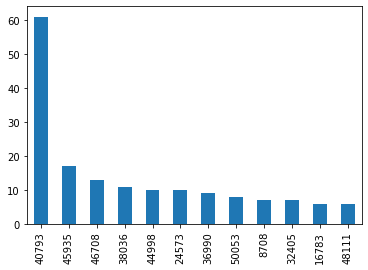

In [269]:
trydf2 = trydf['infected by'].where(trydf.runNo == 1).dropna().value_counts()
trydf2 = trydf2[~(trydf2 <= 5)]
trydf2.plot(kind = 'bar')

In [268]:
trydf1['who'].value_counts()

65274    1
65040    1
63962    1
59456    1
64192    1
        ..
64635    1
49200    1
57677    1
62242    1
61076    1
Name: who, Length: 702, dtype: int64

In [275]:
trydf1.who.value_counts().6537

SyntaxError: invalid syntax (<ipython-input-275-0b874762d359>, line 1)

In [285]:
# Easy way to add columns with the number of occurences of a certain value in a column
# Number of people infected by the same infector:
trydf1['count-infector'] = trydf1.groupby('infected by')['infected by'].transform('count')

trydf1['count-infect-location'] = trydf1.groupby('heading')['heading'].transform('count')
trydf1.sort_values(by = 'count-infector', ascending = False)

who    age infected by infectors-status infectors-age       heading  \
173  50718  adult       40793  pre-symptomatic         child          none   
249  55222  adult       40793     asymptomatic         child  foodpoint 15   
252  55213  adult       40793     asymptomatic         child  foodpoint 15   
254  55206  adult       40793     asymptomatic         child  foodpoint 15   
255  55214  adult       40793     asymptomatic         child  foodpoint 15   
..     ...    ...         ...              ...           ...           ...   
581  62560  adult       55335  pre-symptomatic       elderly          none   
580  62561  adult       55448  pre-symptomatic         adult          none   
578  62476  child       60740  pre-symptomatic         adult    latrine 42   
576  62458  adult       55205  pre-symptomatic         adult          none   
702  67042  adult       63917  pre-symptomatic         adult          none   

    queue-time  experimentNo  runNo  count  count-infector  \
173          0           1.0    1.0     61              61   
249          1           1.0    1.0     61              61   
252          1           1.0    1.0     61              61   
254          1           1.0    1.0     61              61   
255          1           1.0    1.0     61              61   
..         ...           ...    ...    ...             ...   
581          0           1.0    1.0      1               1   
580          0           1.0    1.0      1               1   
578          1           1.0    1.0      1               1   
576          0           1.0    1.0      1               1   
702          0           1.0    1.0      1               1   

     count-infect-location  
173                    325  
249                    125  
252                    125  
254                    125  
255                    125  
..                     ...  
581                    325  
580                    325  
578                      1  
576                    325  
702                    325  

[702 rows x 12 columns]

In [242]:
trydf['runNo'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [240]:
# # Een pivot-table werkt niet, want de nummers worden niet geaggregeerd op enkele manier.
# # Groupby werkt ook niet, want hetzelfde probleem: nummers kunnen niet opgeteld worden of iets.
# # Dus: gebruik set_index()

# trydf.pivot_table(values = ['who', 'age', 'infected by', 'infectors-status', 'infectors-age',
#        'heading', 'queue-time'], index = ['experimentNo', 'runNo'])

# trydf.groupby(['experimentNo', 'runNo'])['who', 'age', 'infected by', 'infectors-status', 'infectors-age',
#        'heading', 'queue-time']




In [243]:
runnumbers = trydf['runNo'].unique()

for number in runnumbers:
    print(number)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


### Calculate R0
- Average number of column 'infector-occurences'

### Network plot proberen:

In [64]:
# Verder niet meer gebruikt
# # Je wilt van data een netwerk visualiseren met als nodes 'who' en 'infected by'.


# for x in data['infected by']:
#     scene_counts[x] = []
# for y in data['who']:
#     appearance_counts
    

In [211]:
list(data['infected by'].unique())

['303',
 '9470',
 '8708',
 '8709',
 '14804',
 '6536',
 '18632',
 '16757',
 '16753',
 '16783',
 '19228',
 '19232',
 '24894',
 '18637',
 '20608',
 '27091',
 '21330',
 '25759',
 '16779',
 '21342',
 '24573',
 '25891',
 '26629',
 '27640',
 '27086',
 '24574',
 '29127',
 '26623',
 '30488',
 '30501',
 '34801',
 '36861',
 '24572',
 '25758',
 '30375',
 '32405',
 '36120',
 '30961',
 '34403',
 '34277',
 '32461',
 '36112',
 '36107',
 '34397',
 '30374',
 '34432',
 '40264',
 '33860',
 '34390',
 '38041',
 '42032',
 '40838',
 '34818',
 '30965',
 '40680',
 '42034',
 '39486',
 '40792',
 '46705',
 '40692',
 '38036',
 '23590',
 '32459',
 '40793',
 '45826',
 '45512',
 '47913',
 '40267',
 '49279',
 '45934',
 '48111',
 '46797',
 '49342',
 '38035',
 '45833',
 '43325',
 '45935',
 '40816',
 '41925',
 '46708',
 '36990',
 '40815',
 '50053',
 '44998',
 '45101',
 '49496',
 '50896',
 '52145',
 '52147',
 '39837',
 '55452',
 '50717',
 '55100',
 '54956',
 '55336',
 '55580',
 nan,
 '55447',
 '55454',
 '55350',
 '55341',


Idee:

 1) merge data['infected by'].unique() en data['who'].unique()
  - hiervoor eerst 'tent' strippen van 'infected by'.
  
 2) create list of edges by making tuples of combinaties data['infected by'] en data['who'].


In [212]:
list(data['infected by'].unique())

['303',
 '9470',
 '8708',
 '8709',
 '14804',
 '6536',
 '18632',
 '16757',
 '16753',
 '16783',
 '19228',
 '19232',
 '24894',
 '18637',
 '20608',
 '27091',
 '21330',
 '25759',
 '16779',
 '21342',
 '24573',
 '25891',
 '26629',
 '27640',
 '27086',
 '24574',
 '29127',
 '26623',
 '30488',
 '30501',
 '34801',
 '36861',
 '24572',
 '25758',
 '30375',
 '32405',
 '36120',
 '30961',
 '34403',
 '34277',
 '32461',
 '36112',
 '36107',
 '34397',
 '30374',
 '34432',
 '40264',
 '33860',
 '34390',
 '38041',
 '42032',
 '40838',
 '34818',
 '30965',
 '40680',
 '42034',
 '39486',
 '40792',
 '46705',
 '40692',
 '38036',
 '23590',
 '32459',
 '40793',
 '45826',
 '45512',
 '47913',
 '40267',
 '49279',
 '45934',
 '48111',
 '46797',
 '49342',
 '38035',
 '45833',
 '43325',
 '45935',
 '40816',
 '41925',
 '46708',
 '36990',
 '40815',
 '50053',
 '44998',
 '45101',
 '49496',
 '50896',
 '52145',
 '52147',
 '39837',
 '55452',
 '50717',
 '55100',
 '54956',
 '55336',
 '55580',
 nan,
 '55447',
 '55454',
 '55350',
 '55341',


In [213]:
# # list(data['who'].unique())
# for i in range(len(edges)):
#     if edges[i][0] == edges[i - 1][0] or ==
# edges[2][0]
# # len(edges)

# if (any edges2[i][0] in j for j in edges[j]):
    

In [214]:
subset = data[['infected by','who',]]
edges = [tuple(x) for x in subset.to_numpy()]
edges

#the number of occurences of an infector:
from collections import Counter
edges2 = Counter(elem[0] for elem in edges)
edges2 = list(edges2.items())
sorted(edges2, key=lambda x: x[1], reverse = True)
# sorted(edges2,key=itemgetter(1))

[('40793', 122),
 ('46397', 95),
 ('303', 86),
 ('45935', 34),
 ('40871', 32),
 ('40127', 30),
 ('46174', 27),
 ('46708', 26),
 ('44988', 26),
 ('40154', 26),
 ('38036', 22),
 ('46814', 22),
 ('44074', 22),
 ('40411', 22),
 ('42985', 22),
 ('47229', 21),
 ('24573', 20),
 ('44998', 20),
 ('48663', 20),
 ('48298', 20),
 ('52928', 20),
 ('39296', 20),
 ('49787', 19),
 ('39613', 19),
 ('36990', 18),
 ('50053', 18),
 ('44581', 18),
 ('39845', 18),
 ('42095', 18),
 ('44009', 18),
 ('41082', 17),
 ('40686', 17),
 ('47710', 16),
 ('58066', 16),
 ('40864', 16),
 ('49622', 16),
 ('57678', 15),
 ('48259', 15),
 ('43795', 15),
 ('57916', 15),
 ('38370', 15),
 ('43920', 15),
 ('48418', 15),
 ('46933', 15),
 ('45295', 15),
 ('43029', 15),
 ('42440', 15),
 ('8708', 14),
 ('32405', 14),
 ('40606', 14),
 ('49206', 14),
 ('41624', 14),
 ('48366', 14),
 ('50220', 14),
 ('48545', 14),
 ('44086', 14),
 ('47667', 14),
 ('41868', 14),
 ('45560', 14),
 ('55567', 13),
 ('35427', 13),
 ('45852', 13),
 ('57927',

In [215]:
Input = [(20, 80), (31, 80), (1, 22), (88, 11), (27, 11)] 
  
Output = {} 
for x, y in Input: 
    if y in Output: 
        Output[y].append((x, y)) 
    else: 
        Output[y] = [(x, y)] 
  
# Printing Output 
print(Output) 

{80: [(20, 80), (31, 80)], 22: [(1, 22)], 11: [(88, 11), (27, 11)]}


In [216]:
# edges2 = list(edges2.items())

out_tup = [i for i in edges2 if i[1] > 1]
out_tup

edges3 = {}
for x, y in edges:
    if x in out_tup:
        edges3[x].append((x,y), inplace = True)
    else: 
        edges3[x] = [(x,y)]
print(edges3)

{'303': [('303', '16693')], '9470': [('9470', '19232')], '8708': [('8708', '16757')], '8709': [('8709', '16664')], '14804': [('14804', '20608')], '6536': [('6536', '21330')], '18632': [('18632', '24894')], '16757': [('16757', '24572')], '16753': [('16753', '30631')], '16783': [('16783', '30488')], '19228': [('19228', '27086')], '19232': [('19232', '26519')], '24894': [('24894', '34432')], '18637': [('18637', '28418')], '20608': [('20608', '36112')], '27091': [('27091', '30374')], '21330': [('21330', '30377')], '25759': [('25759', '40738')], '16779': [('16779', '31321')], '21342': [('21342', '32347')], '24573': [('24573', '38036')], '25891': [('25891', '33275')], '26629': [('26629', '33619')], '27640': [('27640', '34277')], '27086': [('27086', '35956')], '24574': [('24574', '34801')], '29127': [('29127', '36861')], '26623': [('26623', '43325')], '30488': [('30488', '37930')], '30501': [('30501', '46929')], '34801': [('34801', '40692')], '36861': [('36861', '39730')], '24572': [('24572',

In [217]:
edges3 = {}
for (x, y) in edges:
    if x in out_tup:
        edges3 = edges3.append(x,y)
edges3
# out_tup

{}

In [218]:
out_tup
edges

[('303', '6537'),
 ('303', '6536'),
 ('303', '8709'),
 ('303', '8708'),
 ('303', '9470'),
 ('9470', '13488'),
 ('9470', '13489'),
 ('8708', '14299'),
 ('8708', '14298'),
 ('8708', '14297'),
 ('9470', '14804'),
 ('8709', '16664'),
 ('8708', '16783'),
 ('8708', '16753'),
 ('8708', '16779'),
 ('8708', '16757'),
 ('14804', '18183'),
 ('14804', '18182'),
 ('14804', '18632'),
 ('14804', '18637'),
 ('9470', '19228'),
 ('9470', '19232'),
 ('14804', '20608'),
 ('6536', '21342'),
 ('6536', '21330'),
 ('18632', '23591'),
 ('18632', '23590'),
 ('18632', '23592'),
 ('16757', '24574'),
 ('16757', '24573'),
 ('16757', '24572'),
 ('16753', '24571'),
 ('18632', '24894'),
 ('16783', '25163'),
 ('19228', '25758'),
 ('19228', '25759'),
 ('16783', '25891'),
 ('19232', '26518'),
 ('19232', '26519'),
 ('16783', '26623'),
 ('16783', '26629'),
 ('19228', '27091'),
 ('19228', '27086'),
 ('24894', '27519'),
 ('18637', '27640'),
 ('18637', '27639'),
 ('18637', '27638'),
 ('18637', '28418'),
 ('20608', '28803'),
 

In [219]:
([infector], [infectee]) = edges

ValueError: too many values to unpack (expected 2)

In [220]:
a = {t[0]:t[1:] for t in edges} # {'a': (3, 4), 'c': (4, 5), 'b': (3, 4)}
b = {t[0]:t[1:] for t in edges2}

common_keys = list(set(a.keys())&set(b.keys()))
common_keys
diff_unique(a[key][1],b[key][1]) for key in common_keys


SyntaxError: invalid syntax (<ipython-input-220-815e968dc345>, line 6)

In [221]:
edges

[('303', '6537'),
 ('303', '6536'),
 ('303', '8709'),
 ('303', '8708'),
 ('303', '9470'),
 ('9470', '13488'),
 ('9470', '13489'),
 ('8708', '14299'),
 ('8708', '14298'),
 ('8708', '14297'),
 ('9470', '14804'),
 ('8709', '16664'),
 ('8708', '16783'),
 ('8708', '16753'),
 ('8708', '16779'),
 ('8708', '16757'),
 ('14804', '18183'),
 ('14804', '18182'),
 ('14804', '18632'),
 ('14804', '18637'),
 ('9470', '19228'),
 ('9470', '19232'),
 ('14804', '20608'),
 ('6536', '21342'),
 ('6536', '21330'),
 ('18632', '23591'),
 ('18632', '23590'),
 ('18632', '23592'),
 ('16757', '24574'),
 ('16757', '24573'),
 ('16757', '24572'),
 ('16753', '24571'),
 ('18632', '24894'),
 ('16783', '25163'),
 ('19228', '25758'),
 ('19228', '25759'),
 ('16783', '25891'),
 ('19232', '26518'),
 ('19232', '26519'),
 ('16783', '26623'),
 ('16783', '26629'),
 ('19228', '27091'),
 ('19228', '27086'),
 ('24894', '27519'),
 ('18637', '27640'),
 ('18637', '27639'),
 ('18637', '27638'),
 ('18637', '28418'),
 ('20608', '28803'),
 

Nodes of graph: 
['303', '9470', '8708', '8709', '14804', '6536', '18632', '16757', '16753', '16783', '19228', '19232', '24894', '18637', '20608', '27091', '21330', '25759', '16779', '21342', '24573', '25891', '26629', '27640', '27086', '24574', '29127', '26623', '30488', '30501', '34801', '36861', '24572', '25758', '30375', '32405', '36120', '30961', '34403', '34277', '32461', '36112', '36107', '34397', '30374', '34432', '40264', '33860', '34390', '38041', '42032', '40838', '34818', '30965', '40680', '42034', '39486', '40792', '46705', '40692', '38036', '23590', '32459', '40793', '45826', '45512', '47913', '40267', '49279', '45934', '48111', '46797', '49342', '38035', '45833', '43325', '45935', '40816', '41925', '46708', '36990', '40815', '50053', '44998', '45101', '49496', '50896', '52145', '52147', '39837', '55452', '50717', '55100', '54956', '55336', '55580', nan, '55447', '55454', '55350', '55341', '55195', '55558', '55118', '55440', '55222', '55352', '54976', '55220', '49278', '5

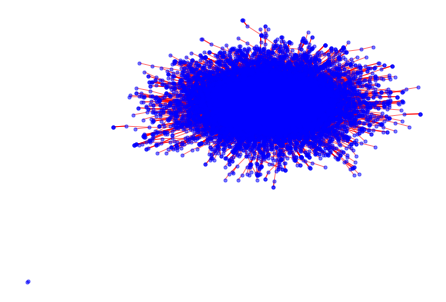

In [222]:
G=nx.Graph()
pos = nx.spring_layout(G, k = 0.5)
# G.add_node("a")
G.add_nodes_from(data['infected by']) #["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])


print("Nodes of graph: ")
print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

nx.draw(G, width = 1, node_color = 'b', node_size = 10,  alpha = 0.5, edge_color = 'red')

plt.show()


C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:


The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.



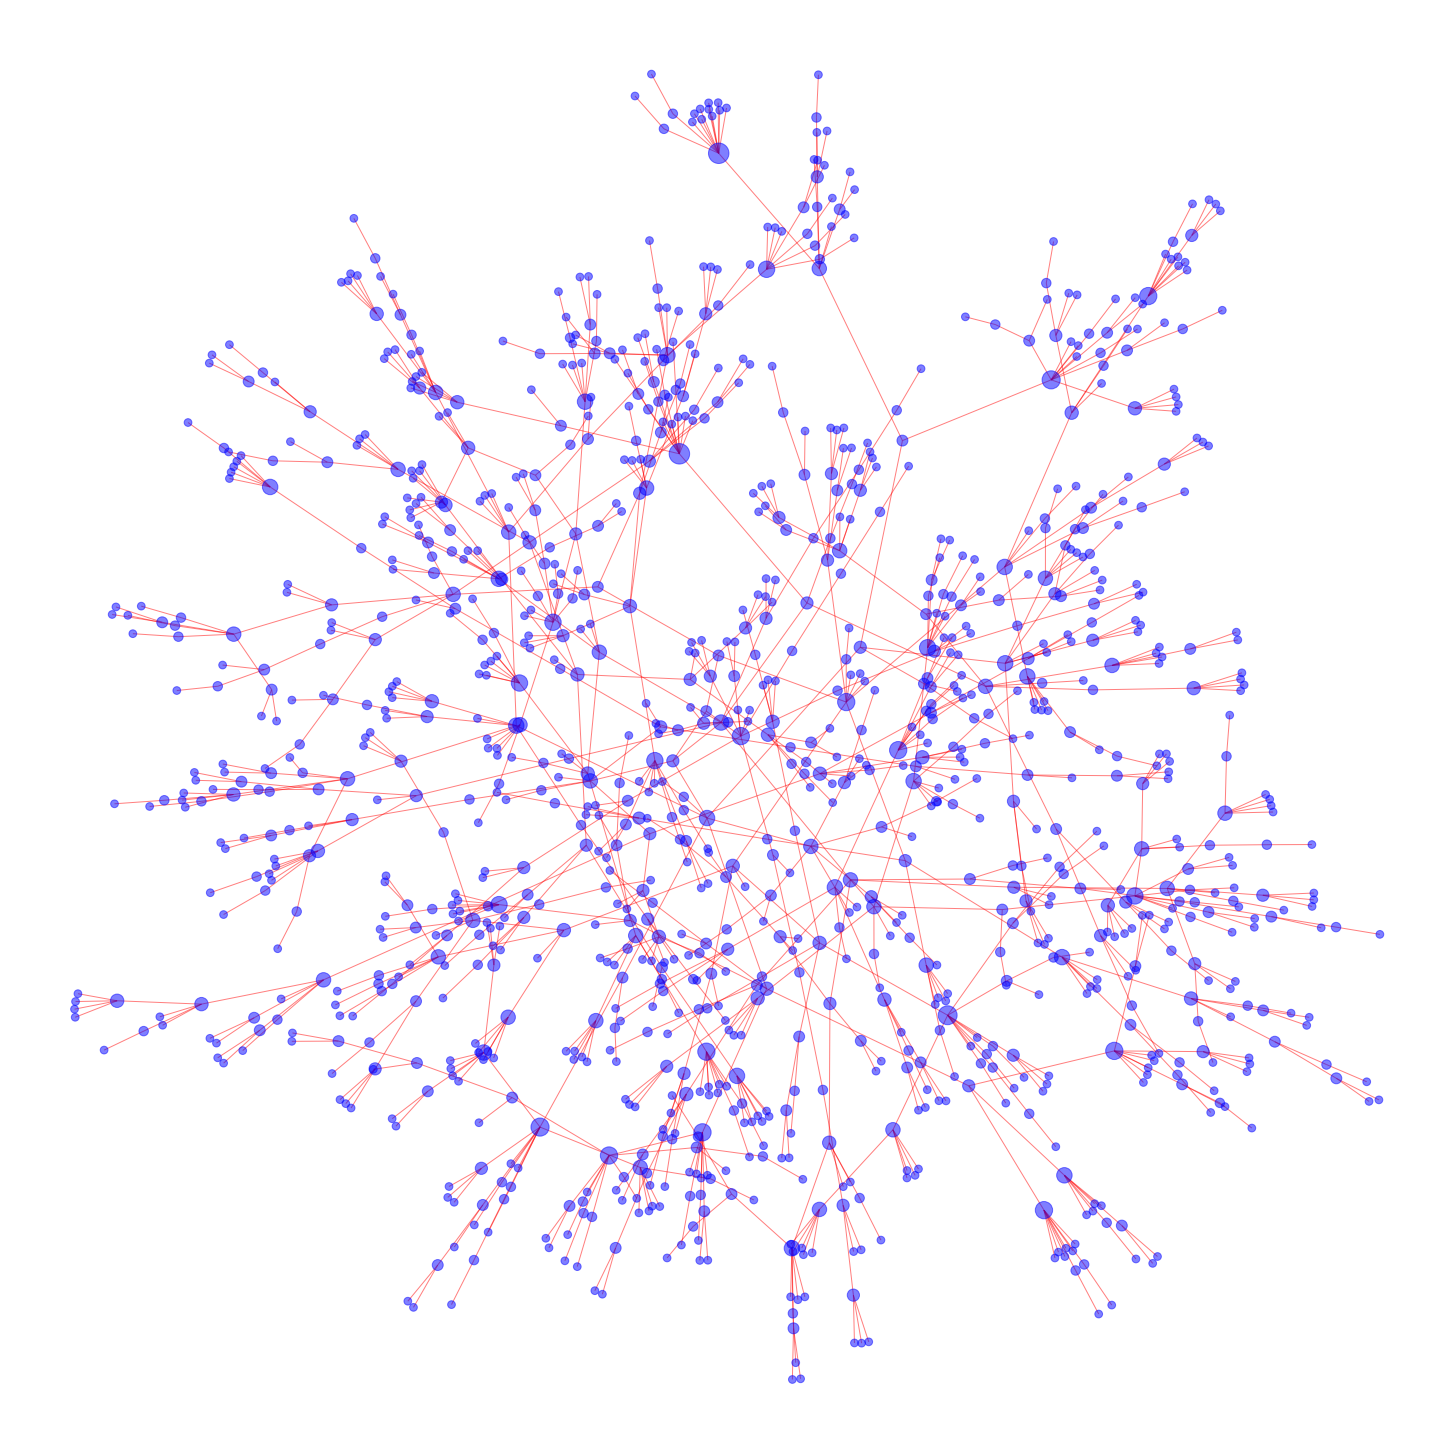

In [435]:
G=nx.Graph()
pos = nx.spring_layout(G)
# G.add_node("a")
G.add_nodes_from(data['infected by']) #["b","c"])

# G.add_edge(1,2)
# edge = ("d", "e")
# G.add_edge(*edge)
# edge = ("a", "b")
# G.add_edge(*edge)
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])


# print("Nodes of graph: ")
# print(G.nodes())
# print("Edges of graph: ")
# print(G.edges())

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:


The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.



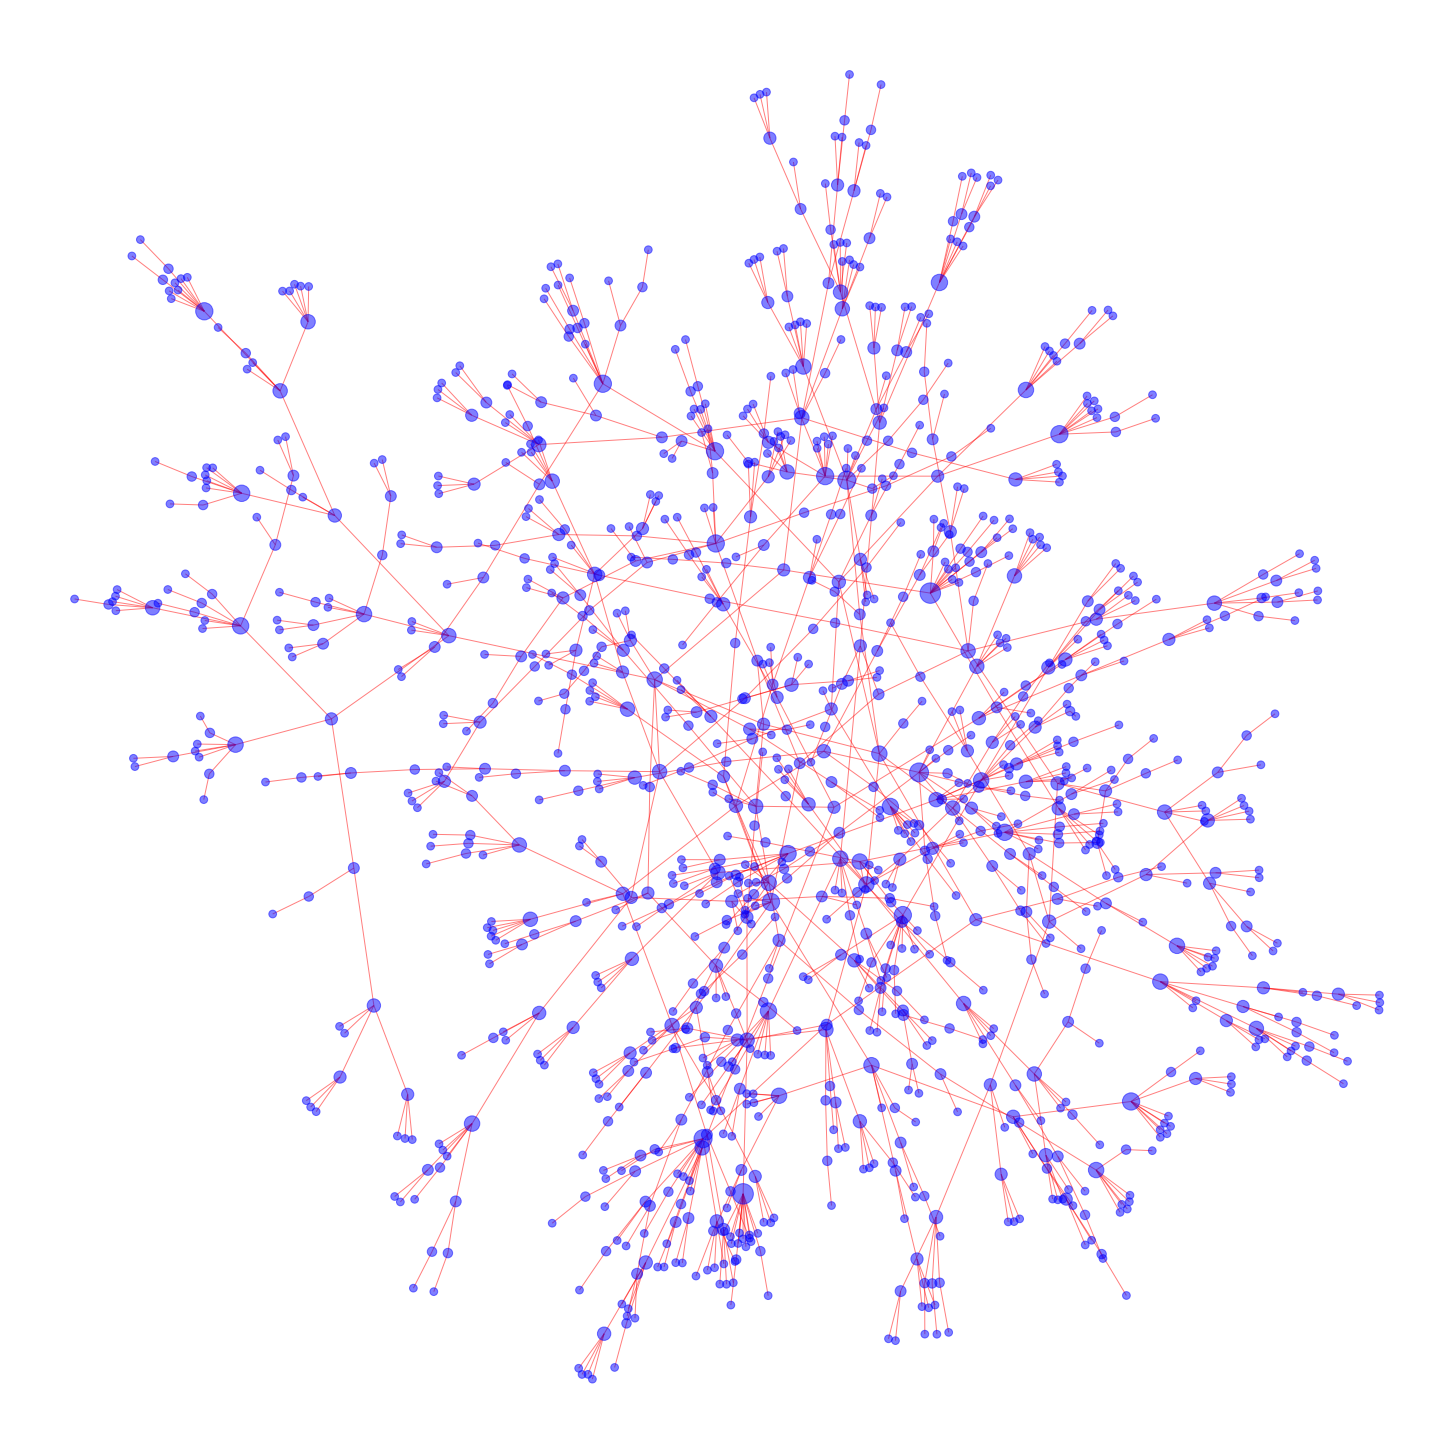

In [436]:
G=nx.Graph()
pos = nx.spring_layout(G, k = 0.3)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:


The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.



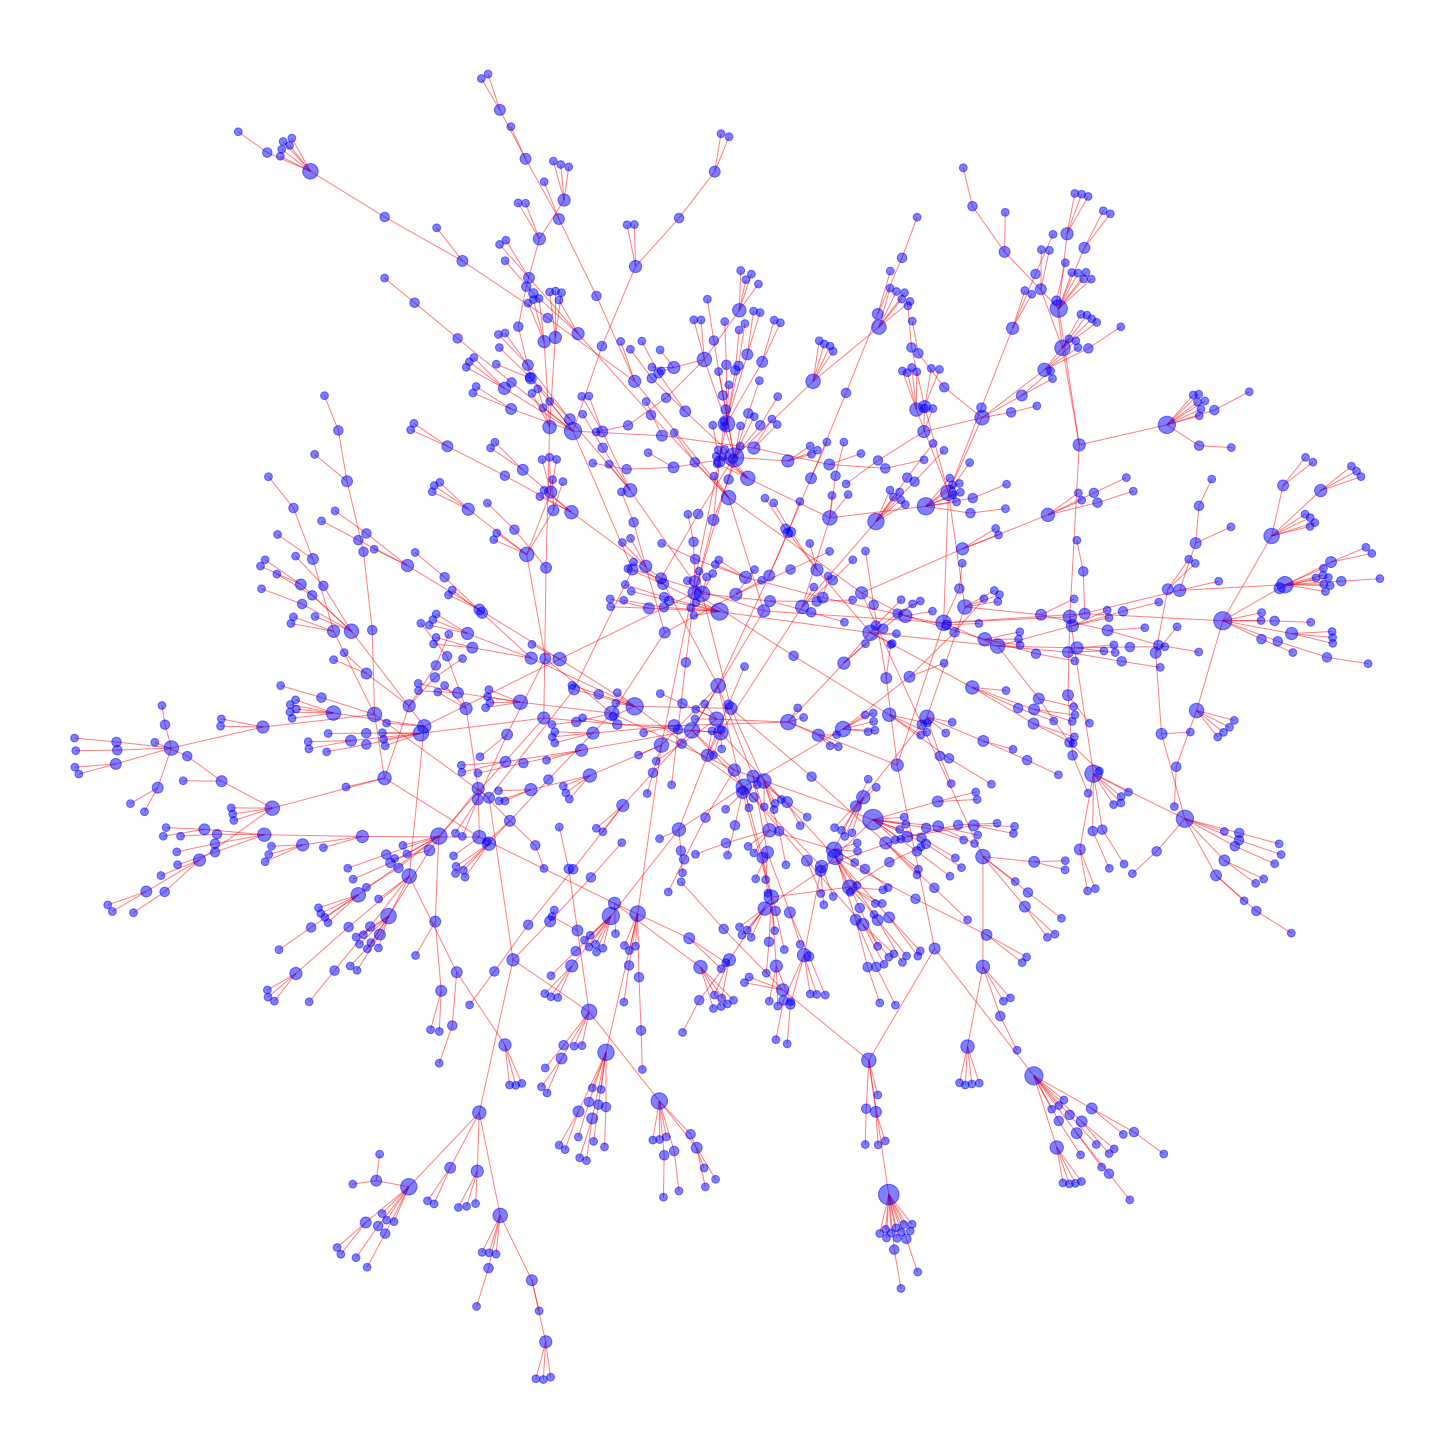

In [437]:
#Shell layout
G=nx.Graph()
pos = nx.shell_layout(G)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

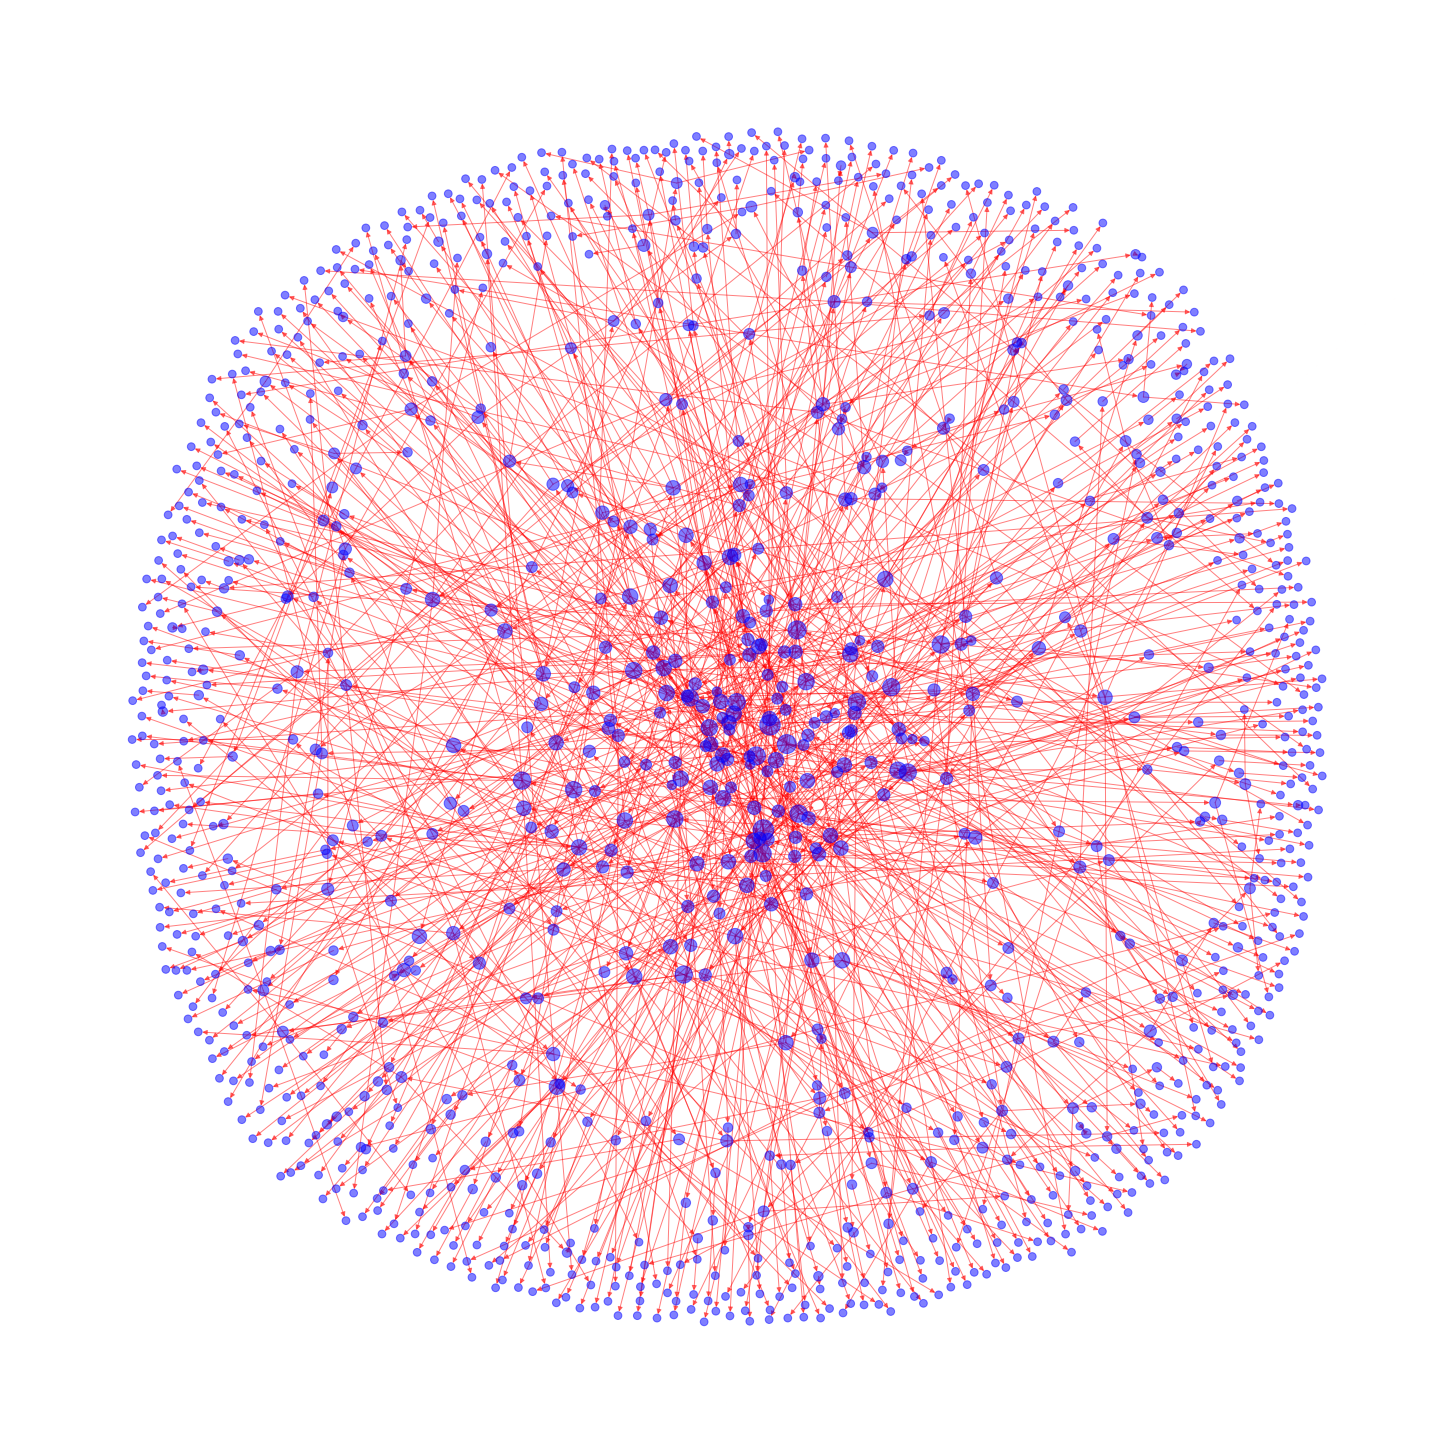

In [571]:
# Directed graph (starts from 1 point)
G=nx.DiGraph()
pos = nx.spring_layout(G, k = 0.5)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.

C:\Users\meyke\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:660: MatplotlibDeprecationWarning:


The iterable functi

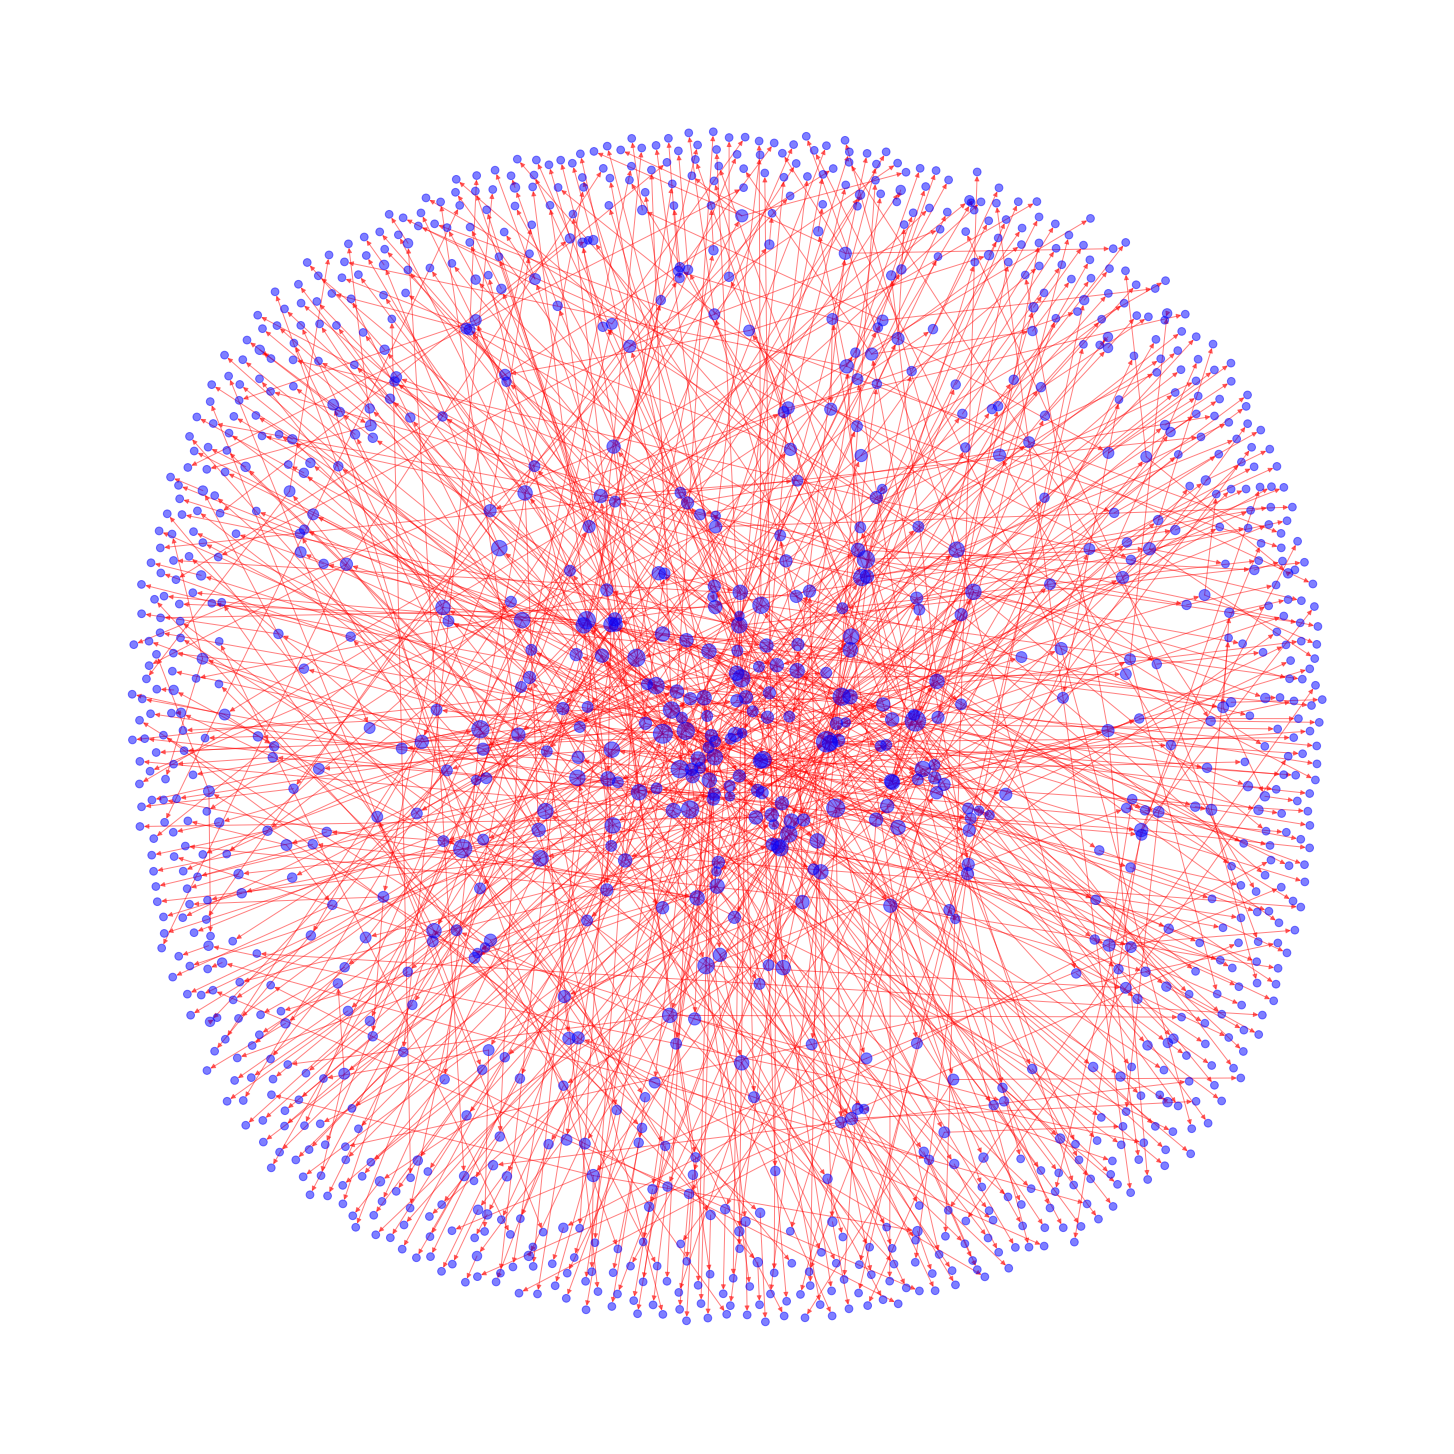

In [569]:
# Directed graph (starts from 1 point), with shell_layout
G=nx.DiGraph()
pos = nx.shell_layout(G)
# k controls the distance between the nodes and varies between 0 and 1
G.add_nodes_from(data['infected by']) #["b","c"])
G.add_edges_from([*edges])#[("a","c"),("c","d"), ("a",1), (1,"d"), ("a",2)])

G.remove_nodes_from(nx.isolates(G)) # removes isolated edges (shouldn't exist).


d = nx.degree(G)
d = [(d[node]+1)*30 for node in G.nodes()]

plt.figure(figsize = (20,20))

nx.draw(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')#node_color = 'b', node_size = degree,  alpha = 0.5, edge_color = 'red')
# width is about the edges-width.
# nx.draw_circular(G, width = 1, node_size = d, node_color = 'b', alpha = 0.5, edge_color = 'r')

plt.show()


Is it possible to only include the nodes that have more than 1 outgoing edge?

In [581]:
# g2=G.copy()
# d_in=g2.in_degree(g2)
# d_out=g2.out_degree(g2)

# for n in g2.nodes():
#     if d_out[n] == 1: 
#         g2.remove_node(n)
        
def remove_edges(G, in_degree=1, out_degree=1):
    g2=G.copy()
    d_in=g2.in_degree(g2)
    d_out=g2.out_degree(g2)
    print(d_in)
    print(d_out)
    for n in g2.nodes():
        if d_in[n]==in_degree and d_out[n] == out_degree: 
            g2.remove_node(n)
    return g2
        
G_trimmed = remove_edges(G)
# G_trimmed.edges()
# #outputs [('C', 'G'), ('G', 'H'), ('K', 'J'), ('J', 'L')]
# G_trimmed.nodes()
()
G_trimmed.nodes()

[('303', 0), ('6680', 1), ('6678', 1), ('17831', 1), ('17837', 1), ('17836', 1), ('19862', 1), ('13709', 1), ('23753', 1), ('23891', 1), ('25684', 1), ('20946', 1), ('6679', 1), ('26470', 1), ('22940', 1), ('21852', 1), ('23889', 1), ('25903', 1), ('28936', 1), ('23654', 1), ('30205', 1), ('31844', 1), ('21866', 1), ('31840', 1), ('26384', 1), ('20947', 1), ('22939', 1), ('36037', 1), ('22941', 1), ('34144', 1), ('32413', 1), ('29874', 1), ('33764', 1), ('37585', 1), ('28933', 1), ('36599', 1), ('33759', 1), ('32412', 1), ('26471', 1), ('35597', 1), ('33772', 1), ('33344', 1), ('25913', 1), ('33662', 1), ('33770', 1), ('25908', 1), ('35702', 1), ('36583', 1), ('28486', 1), ('28487', 1), ('28485', 1), ('29432', 1), ('31837', 1), ('35127', 1), ('39238', 1), ('37471', 1), ('33769', 1), ('42794', 1), ('38797', 1), ('39348', 1), ('36689', 1), ('33409', 1), ('40397', 1), ('36687', 1), ('34789', 1), ('38924', 1), ('31830', 1), ('38776', 1), ('40129', 1), ('43830', 1), ('41766', 1), ('43298', 

RuntimeError: dictionary changed size during iteration

In [572]:
def remove_flow_through(graph):
    for n in graph.nodes():
        pred = graph.predecessors(n)
        succ = graph.successors(n)
        if len(pred) == len(succ) == 1:
            graph.remove_node(n)
            graph.add_edge(pred[0], succ[0])

while True:
    prev_len = len(G)
    remove_flow_through(G)
    if len(G) == prev_len:
        break

TypeError: object of type 'dict_keyiterator' has no len()

In [445]:
outdeg

OutDegreeView({'303': 3, '6680': 2, '6678': 3, '17831': 5, '17837': 6, '17836': 6, '19862': 8, '13709': 2, '23753': 5, '23891': 1, '25684': 5, '20946': 3, '6679': 8, '26470': 5, '22940': 1, '21852': 3, '23889': 3, '25903': 2, '28936': 3, '23654': 3, '30205': 2, '31844': 1, '21866': 1, '31840': 4, '26384': 4, '20947': 1, '22939': 4, '36037': 3, '22941': 3, '34144': 5, '32413': 3, '29874': 1, '33764': 2, '37585': 2, '28933': 5, '36599': 4, '33759': 3, '32412': 1, '26471': 3, '35597': 4, '33772': 6, '33344': 3, '25913': 6, '33662': 1, '33770': 1, '25908': 5, '35702': 2, '36583': 4, '28486': 2, '28487': 2, '28485': 3, '29432': 3, '31837': 1, '35127': 4, '39238': 2, '37471': 3, '33769': 1, '42794': 4, '38797': 6, '39348': 2, '36689': 1, '33409': 3, '40397': 4, '36687': 6, '34789': 1, '38924': 1, '31830': 1, '38776': 6, '40129': 6, '43830': 2, '41766': 1, '43298': 3, '33659': 5, '39462': 5, '36031': 3, '37331': 2, '42112': 6, '41352': 5, '42445': 2, '39463': 8, '23653': 3, '33775': 1, '40972

Perhaps take a look at:
- https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial

## Prutselen om er een goede plot van te maken:

In [439]:
pd.DataFrame(data.groupby(['infected by'])['who'].count().sort_values(ascending = False)).iloc[0]#.idxmax()

who    12
Name: 52262, dtype: int64

In [337]:
data.groupby(['infected by'])['who'].count().sort_values(ascending = False).iloc[0]#.idxmax()
data.groupby(['infected by'])['who'].count().sort_values(ascending = False).idxmax()
infectedby2 = pd.DataFrame(data.groupby(['infected by'])['who'].count().loc[['tent 43393']])
infectedby2['experimentNo'] = experimentNo
infectedby3 = pd.DataFrame(data.groupby(['infected by'])['who'].count().loc[['tent 43393']])
infectedby3['experimentNo'] = experimentNo + 1
infectedby2.append(infectedby3)

who  experimentNo
infected by                   
tent 43393    29            74
tent 43393    29            75

In [341]:
m4 = pd.melt(m, id_vars=['run','Day','mobility'], value_vars = ['infected children'],
            var_name = 'datatype',value_name = 'data')
infectedby4 = pd.melt(infectedby2, id_vars = ['who','experimentNo'.T.unstack()

infected by              
tent 43393   who             29
             experimentNo    74
dtype: int64

ValueError: not enough values to unpack (expected 2, got 0)

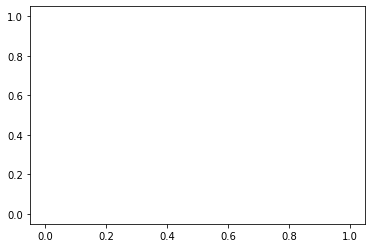

In [349]:
fig, ax = plt.plot()
rects1 = ax.bar(infectedby2['who'], label = 1)
# rects2 = ax.bar(infectedby3['who'], label = 2)
fig.tight_layout()
plt.show()

In [338]:
ax = sns.barplot(x = 'infected by', y = 'who', hue = 'experimentNo', data = infectedby2)

ValueError: Could not interpret input 'infected by'

## Visualising
1) Understand the 'normal' dimensions of the data:
 
 - How many people are infected by the biggest infector across experiments? (bar charts)  
 - What are most common infection locations? - grouped by type of facility - (bar charts?)
 - What disease stage were the infectors in?
 - What age group where the infectors?
 - What age groups infects what age group mostly?

2) Network of infections
 - map the infection network with nodes and links
    
    
3) On experiment-level:        
 - how many people are infected by the same person (bar charts?)
 - how many people where at home when they got infected? -->  (bar chart)

In [246]:
bigdata.where(bigdata['experimentNo'] == 1).dropna()

who      age infected by infectors-status infectors-age  \
0      6604    adult    tent 303  pre-symptomatic         child   
1      6603    adult    tent 303  pre-symptomatic         child   
2     16991    adult    tent 303      symptomatic         child   
3     17523    adult   tent 6603  pre-symptomatic         adult   
4     18426    child   tent 6603     asymptomatic         adult   
5     18424    child   tent 6603     asymptomatic         adult   
6     20698    adult  tent 18426  pre-symptomatic         child   
7     20699    adult  tent 18426  pre-symptomatic         child   
8     20700    adult  tent 18426  pre-symptomatic         child   
9     21098    child    tent 303      symptomatic         child   
10    23121    child    tent 303      symptomatic         child   
11    24250    adult  tent 18424  pre-symptomatic         child   
12    24251    adult  tent 18424  pre-symptomatic         child   
13    24252  elderly  tent 18424  pre-symptomatic         child   
14    24879    adult  tent 16991  pre-symptomatic         adult   
15    28583    child  tent 18426      symptomatic         child   
16    30704    adult  tent 21098  pre-symptomatic         child   
17    30703    adult  tent 21098  pre-symptomatic         child   
18    31059    adult  tent 20699  pre-symptomatic         adult   
19    31117    child  tent 20699  pre-symptomatic         adult   
20    31115  elderly  tent 20699  pre-symptomatic         adult   
21    31637    adult  tent 20699  pre-symptomatic         adult   
22    31966    child  tent 20699  pre-symptomatic         adult   
23    31969    child  tent 20699  pre-symptomatic         adult   
24    32228    adult  tent 23121  pre-symptomatic         child   
25    32230  elderly  tent 23121  pre-symptomatic         child   
26    32229    adult  tent 23121  pre-symptomatic         child   
27    32944    adult  tent 20698     asymptomatic         adult   
28    33030    adult  tent 21098     asymptomatic         child   
29    33344    child  tent 24251  pre-symptomatic         adult   
...     ...      ...         ...              ...           ...   
1162  61473    child  tent 48084      symptomatic       elderly   
1163  61476    child  tent 60856  pre-symptomatic         child   
1164  61482    child  tent 55558      symptomatic         child   
1165  61492    child  tent 56178     asymptomatic       elderly   
1166  61494    child  tent 59568      symptomatic         adult   
1167  61495    child  tent 59568      symptomatic         adult   
1168  61502    child  tent 57924      symptomatic         adult   
1169  61506    child  tent 56996      symptomatic         adult   
1170  61511    child  tent 53813      symptomatic         child   
1171  61515    child  tent 59671  pre-symptomatic       elderly   
1172  61518    child  tent 59382      symptomatic         child   
1173  61519    child  tent 60651  pre-symptomatic         child   
1174  61526    child  tent 57768     asymptomatic         adult   
1175  61527    child  tent 57496      symptomatic         child   
1176  61532    child  tent 59385     asymptomatic         adult   
1177  61536    child  tent 60999     asymptomatic         child   
1178  61538    child  tent 58173     asymptomatic         adult   
1179  61546    child  tent 56767      symptomatic         child   
1180  61547    child  tent 58355     asymptomatic         child   
1181  61548    child  tent 58389  pre-symptomatic         child   
1182  61549    child  tent 55179     asymptomatic         child   
1183  61552    child  tent 59894      symptomatic         child   
1184  61553    child  tent 56237      symptomatic         adult   
1185  61554    child  tent 60710     asymptomatic       elderly   
1186  61558    child  tent 58638      symptomatic         child   
1187  61563    child  tent 61121     asymptomatic         child   
1188  61565    child  tent 57261      symptomatic         adult   
1189  61566    child  tent 58771      symptomatic      

In [287]:
# pd.melt(infectedby, id_vars='')
infectedby.idxmax()

# infectedby.loc[infectedby.groupby(['experimentNo'])['who'].sort_values('who', ascending = False).head(2)]

# bigdata.loc[bigdata.groupby(['experimentNo','infected by'])['who'].nlargest(2).index.get_level_values(1)]
infectedby.sort_values(['experiment'])

TypeError: reduction operation 'argmax' not allowed for this dtype

In [299]:
infectedby = bigdata.groupby(['experimentNo','infected by'])['who'].count()
infectedby = pd.DataFrame(infectedby).sort_values(by=['experimentNo','who'], ascending = False)
infectedby.idxmax()['who']
# 


who    (23, tent 46851)
dtype: object

In [300]:
infectedby.applymap( lambda who: who.max())

AttributeError: ("'int' object has no attribute 'max'", 'occurred at index who')

In [352]:
print(infectedby.iloc[0])
infectedby

who    12
Name: (41, tent 39466), dtype: int64


who
experimentNo infected by       
41           tent 39466      12
             tent 52262      12
             tent 38923      10
             tent 33661       9
             tent 46449       9
             tent 19862       8
             tent 39463       8
             tent 46664       8
             tent 47580       8
             tent 47695       8
             tent 49875       8
             tent 49910       8
             tent 50940       8
             tent 6679        8
             tent 44751       7
             tent 44828       7
             tent 47178       7
             tent 49088       7
             tent 49774       7
             tent 50039       7
             tent 51243       7
             tent 17836       6
             tent 17837       6
             tent 25913       6
             tent 33772       6
             tent 36687       6
             tent 38776       6
             tent 38797       6
             tent 40129       6
             tent 40461       6
...                         ...
1            tent 59849       1
             tent 59872       1
             tent 59894       1
             tent 59918       1
             tent 59980       1
             tent 60085       1
             tent 60099       1
             tent 60111       1
             tent 60142       1
             tent 60145       1
             tent 60170       1
             tent 60263       1
             tent 60340       1
             tent 60419       1
             tent 60488       1
             tent 60506       1
             tent 60509       1
             tent 60535       1
             tent 60550       1
             tent 60605       1
             tent 60651       1
             tent 60668       1
             tent 60682       1
             tent 60710       1
             tent 60833       1
             tent 60840       1
             tent 60856       1
             tent 60966       1
             tent 61121       1
             waterpoint 10    1

[20105 rows x 1 columns]

In [256]:
ax = sns.barplot(x = 'infected by', y = 'who', hue = 'experimentNo')

ValueError: Could not interpret input 'infected by'

1) First, the following DataFrame gives insight in how many people are infected by the same infector:

In [227]:
infectedby = data.groupby(['infected by'])['who'].count()
infectedby = pd.DataFrame(infectedby).sort_values(by=['who'], ascending = False)
infectedby.head()

who
infected by     
tent 47549    10
tent 42610     9
tent 37930     9
tent 43830     8
tent 8613      8

    - This can be specified per location as well:
    it can be seen that most people are infected at home

In [233]:
infectedwhere = data.groupby(['heading'])['who'].count()
infectedwhere = pd.DataFrame(infectedwhere).sort_values(by=['who'], ascending = False)
infectedwhere.tail()

who
heading         
patch 24 5     1
patch 3 14     1
patch 3 30     1
patch 3 38     1
patch 14 18    1

Grouping the data by infector and infection location, gives insight in how many people were infected in the same place by the same person:

In [266]:
infectedbywhere = data.groupby(['infected by','heading'])['who'].count()
infectedbywhere = pd.DataFrame(infectedbywhere)
infectedbywhere

who
infected by heading           
tent 13110  hc-fac 14        1
            none             3
            waterpoint 12    1
tent 13118  none             2
tent 15100  latrine 41       1
            latrine 45       1
            waterpoint 6     2
tent 15122  none             2
            patch 12 6       1
            waterpoint 6     1
            waterpoint 7     1
tent 15790  latrine 25       1
            none             1
            waterpoint 11    2
            waterpoint 6     2
tent 15794  latrine 1        1
            latrine 54       1
            none             2
            waterpoint 5     2
            waterpoint 9     1
tent 15805  none             1
            waterpoint 11    1
            waterpoint 13    2
tent 16316  none             2
            waterpoint 13    3
            waterpoint 5     1
tent 18234  latrine 1        1
            latrine 48       1
            patch 16 40      1
            waterpoint 11    1
...                        ...
tent 56094  latrine 58       1
tent 56138  latrine 53       1
tent 56148  waterpoint 10    2
tent 56207  latrine 33       1
tent 56242  latrine 36       1
tent 56280  latrine 21       1
tent 56287  latrine 22       1
tent 56303  latrine 26       1
tent 56330  waterpoint 9     1
tent 56332  latrine 30       1
tent 56339  latrine 22       1
tent 56449  patch 22 2       1
            waterpoint 7     1
tent 56500  waterpoint 11    1
tent 56521  waterpoint 6     1
tent 56536  waterpoint 6     1
tent 56761  latrine 35       1
tent 56841  latrine 34       1
tent 6677   waterpoint 9     2
tent 6678   latrine 36       1
            latrine 50       1
            patch 9 26       1
            waterpoint 13    2
            waterpoint 5     2
            waterpoint 6     1
tent 8613   latrine 21       1
            none             2
            patch 17 27      1
            waterpoint 10    1
            waterpoint 6     3

[940 rows x 1 columns]

In [221]:
# data.sort_values(by=['infected by','heading'])
maininfectors = infectedby.sort_values(by=['who'], ascending = False)
maininfectors.head()

who
infected by heading           
tent 42081  foodpoint 15     6
tent 37930  foodpoint 15     6
tent 46091  foodpoint 15     5
tent 44306  waterpoint 11    4
tent 45713  foodpoint 15     4

In [176]:
data3 = data.groupby(['infected by','heading','queue-time']).size()
data3 = pd.DataFrame(data3)
data3.rename(columns={0:"number"}, inplace = True)
display(data3.columns)
# data3.sort_values(by=['number'])
data3.head()

Index(['number'], dtype='object')

number
infected by heading       queue-time        
tent 13110  hc-fac 14     1                1
            none          0                3
            waterpoint 12 1                1
tent 13118  none          0                2
tent 15100  latrine 41    1                1

In [177]:
data4 = data2.groupby(['infected by']).size()
data4 = pd.DataFrame(data4)
data4.rename(columns={0:"number"}, inplace = True)
display(data4.columns)
data4.sort_values(by=['number'], ascending = False, inplace = True)
data4.reset_index().head()

Index(['number'], dtype='object')

infected by  number
0       13110       1
1       55021       1
2       54988       1
3       54955       1
4       54923       1

In [178]:
wheredf = data2.groupby(['heading','infected by','queue-time']).size()
wheredf = pd.DataFrame(wheredf)
wheredf.head(8)

0
heading infected by queue-time   
home    15099       "none" 0    1
        15100       "none" 0    1
        18234       "none" 0    1
        18235       "none" 0    1
        19576       "none" 0    1
        21259       "none" 0    1
        21260       "none" 0    1
        21261       "none" 0    1

In [179]:
wheredf2 = data2.groupby(['heading','queue-time']).size()
wheredf2 = pd.DataFrame(wheredf2)
wheredf2.rename(columns={0:"number"}, inplace = True)
wheredf2.sort_values(by=['number'], ascending = False, inplace = True)
wheredf2.reset_index().head()

heading     queue-time  number
0        home       "none" 0     325
1  tent 37930  (foodpoint 15       6
2  tent 42081  (foodpoint 15       6
3  tent 46091  (foodpoint 15       5
4  tent 39585  (waterpoint 8       4

In [180]:
data2.tail()

infected by     heading     queue-time
1186       57079  tent 56521  (waterpoint 6
1187       57098  tent 53182    (latrine 36
1188       57104  tent 55597    (latrine 56
1189       57120  tent 55955     (latrine 2
1190       57139  tent 56841    (latrine 34

In [181]:
# g = sns.catplot(x = 'heading', y = 'number',hue = 'infected by', data = wheredf3, kind = 'bar',aspect = 20)
# plt.figure(figsize = (20,10))

In [182]:
wheredf.reset_index(inplace = True)
wheredf.rename(columns={0:"number"}, inplace = True)
wheredf.head()

heading infected by queue-time  number
0    home       15099   "none" 0       1
1    home       15100   "none" 0       1
2    home       18234   "none" 0       1
3    home       18235   "none" 0       1
4    home       19576   "none" 0       1

In [183]:
# wheredf3['heading'].plot(kind='barh')

In [184]:
wheredf3 = wheredf2.where(wheredf2['number'] >= 10).dropna()
wheredf3.reset_index(inplace = True)
wheredf3.head()

heading queue-time  number
0    home   "none" 0   325.0

In [185]:
wheredf3['heading'].unique()

array(['home'], dtype=object)

Text(0, 0.5, 'number of infections')

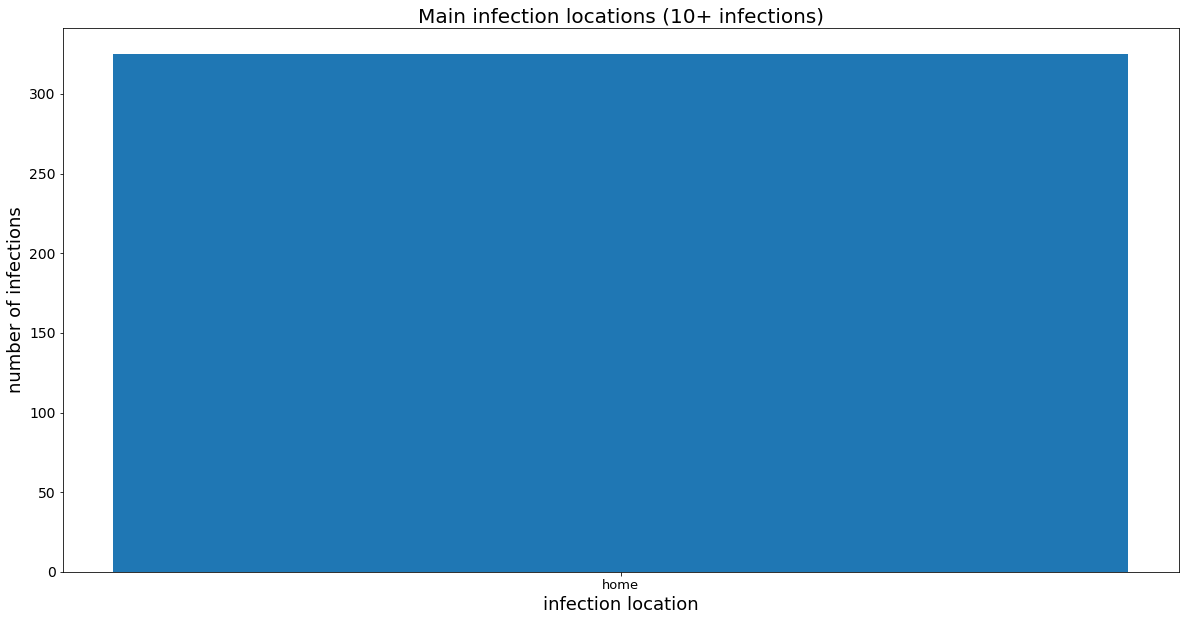

In [186]:
import matplotlib.pylab as pylab
params = {#'legend.fontsize': 'x-large',
          'figure.figsize': (20,10),
         'axes.labelsize': 14,
         'axes.titlesize': 18,
         'xtick.labelsize': 13,
         'ytick.labelsize':14}
pylab.rcParams.update(params)

fig = plt.bar('heading','number',data = wheredf3) 

plt.title('Main infection locations (10+ infections)', fontsize = 20)
plt.xlabel('infection location', fontsize = 18)
plt.ylabel('number of infections', fontsize = 18)

# objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
# y_pos = np.arange(len(objects))
# performance = [10,8,6,4,2,1]

# plt.bar(y_pos, performance, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
# plt.ylabel('Usage')
# plt.title('Programming language usage')

In [187]:
who = data4.reset_index()
who1 = who.where(who['number'] >= 8).dropna()
who1

Empty DataFrame
Columns: [infected by, number]
Index: []

In [188]:
# dit laat zien hoe vaak het voorkwam dat iemand x aantal mensen heeft geïnfecteerd
# 'infected by' is in dit geval hoe vaak het voorkwam.
who2 = who.groupby('number').count().reset_index()
who2[::-1]

number  infected by
0       1         1191

Text(0, 0.5, 'Number of occurences')

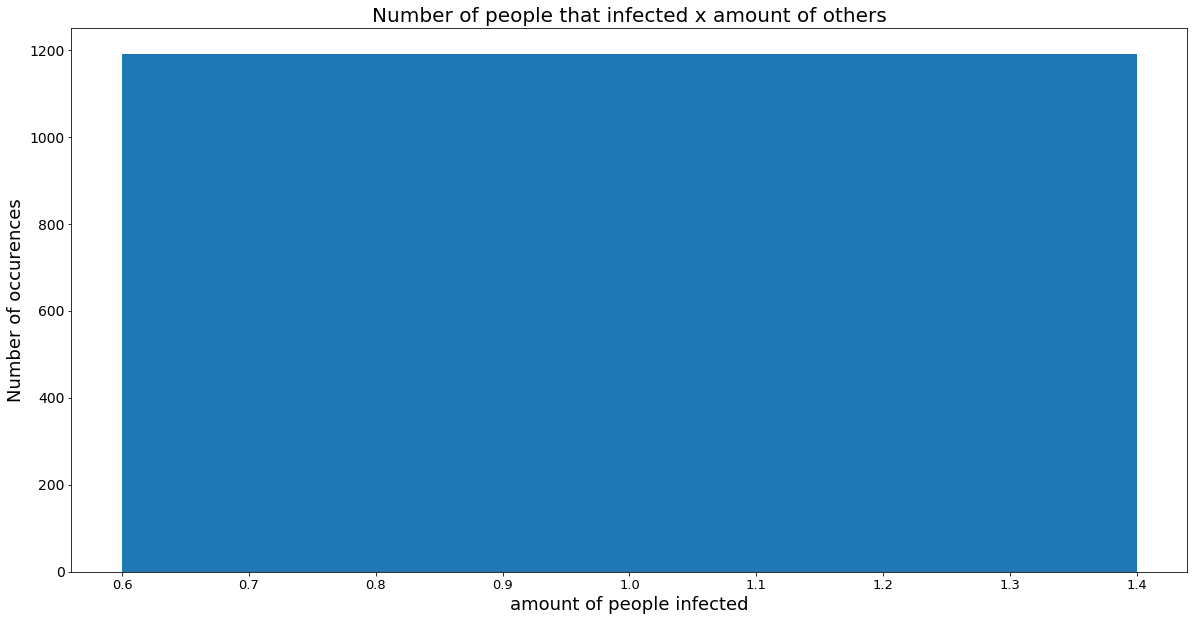

In [189]:
# dit laat zien hoe vaak het voorkwam dat iemand x aantal mensen heeft geïnfecteerd
# 'infected by' is in dit geval hoe vaak het voorkwam.

fig = plt.bar('number','infected by', data = who2) 

plt.title('Number of people that infected x amount of others', fontsize = 20)
plt.xlabel('amount of people infected', fontsize = 18)
plt.ylabel('Number of occurences', fontsize = 18)

Text(0, 0.5, 'number of people 1 person infected')

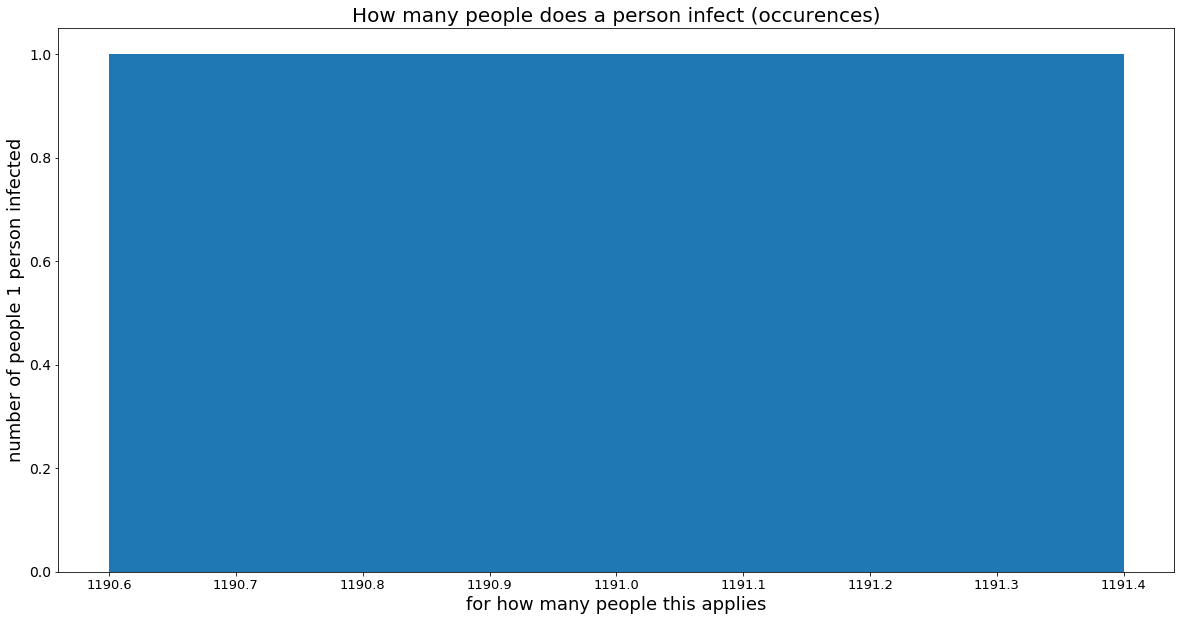

In [190]:
# dit laat zien hoe vaak het voorkwam dat iemand x aantal mensen heeft geïnfecteerd
# 'infected by' is in dit geval hoe vaak het voorkwam.

fig = plt.bar('infected by','number', data = who2) 

plt.title('How many people does a person infect (occurences)', fontsize = 20)
plt.xlabel('for how many people this applies', fontsize = 18)
plt.ylabel('number of people 1 person infected',fontsize = 18)

In [343]:
# parallel coordinates proberen:

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = data2['infected by'],
                   colorscale = 'RdYlGn',
                   showscale = True,
                   cmin = 380,
                   cmax = 56121
                   ),
        dimensions = list([
            dict(range = [380,56121],
                label = "infected by", values = data2['infected by']),
            dict(#tickvals = [1,2,3,4],
                #ticktext = ['free', 'isolation', 'no-elderly', 'quarantined'],
#                 constraintrange = [1,2],
                label = "queue-time", values = data2["queue-time"]),
#             dict(range = [min(ymeanw['cum-infected']), max(ymeanw['cum-infected'])],
# #                  ticktext = ['22 m2', '35 m2', '45 m2'],
#                  label = "total infections", values = ymeanw["cum-infected"]),
#             dict(range = [min(ymeanw['infected elderly']), max(ymeanw['infected elderly'])],
#                 label = "infected elderly", values = ymeanw['infected elderly']), 
#             dict(range = [min(ymeanw['infected adults']), max(ymeanw['infected adults'])],
#                 label = "infected adults", values = ymeanw['infected adults']), 
#             dict(range = [min(ymeanw['infected children']), max(ymeanw['infected children'])],
#                 label = "infected children", values = ymeanw['infected children']), 

        ])
    )
)
fig.show()



In [342]:
# poging 2#BASIC EXAMPLE: maar dan met mobility als nummertjes

import plotly.express as px

fig = px.parallel_coordinates(data2,# color="infected by",
#                               labels={"experimentNo": "Experiment number", 
#                                       "Pr1:Road-proximity": "Pr1:Road", 
#                                       "Pr2:Neighbour-proximity": "Pr2:Neighbours",
#                                       "Pr3:Healthcare-proximity": "Pr3:Healthcare",
#                                       "average-distance": "Average Distance", 
#                                       "covered-shelters": "Covered shelters", 
#                                       "avg-coverage": "Share of shelters covered",
#                                       "sumovercapacity": "Lack of capacity", 
#                                       "unusedcapacity": "Unused capacity"},
                              dimensions={"infected by",#"heading", 
                                          "queue-time" },
                             color_continuous_scale=px.colors.diverging.RdYlGn #,
#                              color_continuous_midpoint=3
                             )
fig.show()

## Hoe de data preparation werkt:

In [171]:
data = pd.read_csv('testrun-output-factorasymptomatic', sep = ']', header = None)
data = data.T
data.columns = ['string']
# data.head()

In [172]:
data = data.replace({'\[':''}, regex = True)
# data.tail()

**De file begint met een getal, die aangeeft wat de waarde van de variable was.** 
*Bijvoorbeeld: bij factor-asymptomatic is dit 1.5, 0.5 of 2.*

**De file eindigt met de timer, die aangeeft hoe lang het experiment heeft geduurd.** *Bijvoorbeeld de waarde 7147.32*

**Opschonen:**
- Strip de variabele-waarde en gebruik die als titel voor het dataframe
    - de timer-waarde is niet meer belangrijk (enkel gebruikt om aparte txtfiles te maken)
- voeg de rest van de data in het dataframe
- 

1) Strip de variabele-waarde en bewaar die als *variable_setting*

In [173]:
#the variable that will be removed is stored and the timer data is removed:
data = data.iloc[:-2]
variable_setting = data.iloc[0,0][1]
# variable_setting

In [174]:
# The corrected data looks like: (a ' ' is maintained, as the other datalines have this as well.)
data.iloc[0][0][2:]

#So this is set in the dataframe:
data.iloc[0,0] = data.iloc[0][0][2:]

# data.head()

2) Dataframe maken en opschonen

Kolommen maken:
- who 
- infecting agent
- destination when infected
- queue-time

In [175]:
data['who'] = data['string'].str.split(' ').str[1]
data['infected by'] = data['string'].str.split('\(').str[1]
data['infected by'] = data['infected by'].str.split(')').str[0]
data['heading'] = data['string'].str.split('\(').str[2]
data['heading'] = data['heading'].str.split(')').str[0]
data['heading'].replace(np.nan, 'none', inplace = True)
data['queue-time'] = data['string'].str.slice(-1)

# and finally, drop the column that is now split up in the new columns
data.drop(['string'], axis = 1, inplace = True)
data.head()


who infected by       heading queue-time
0   6678    tent 308          none          0
1   6677    tent 308          none          0
2   8613    tent 308     latrine 1          1
3  13118    tent 308  waterpoint 9          1
4  13110    tent 308  waterpoint 9          1

***In the 'heading'-column, many agents wrote down a patch. This indicates they are still at a facility, and ready to head home. How many are there of these?***

- *should be solved in new experiments*

In [264]:
ahb = data.where(data['heading'].str.split(' ').str[0] == 'patch')
ahb.dropna().count()

who            55
infected by    55
heading        55
queue-time     55
dtype: int64

###  Nu ook de ALT_files inlezen en op de juiste wijze toevoegen aan (alt_)bigdata:

In [236]:
alt_folders = []
for x in os.listdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\'):
    if x.startswith("ALT_"):
        alt_folders.append(x)
print(len(alt_folders))
alt_folders

3


['ALT_output compliance 25-50-100',
 'ALT_output factor-asymptomtatic 0.5-1.5-2 (2x)',
 'ALT_output mobility with old infection-network analysis (3x)']

In [363]:
alt_bigdata = pd.DataFrame()
#experimentNo is continued
for alt_folder in alt_folders:
    os.chdir('C:\\Users\\meyke\\Desktop\\COVID-19 camps project\\' + alt_folder)
    
    for x in os.listdir():
        if x.startswith("testrun"):
            data = pd.DataFrame()
            data = pd.read_csv(x, sep = ']', header = None)
            data = data.T
            data.columns = ['string']
            data = data.replace({'\[':''}, regex = True)
             #the variable that will be removed is stored and the timer data is removed:
    #         data = data.iloc[:-2]
            variable_setting = data.iloc[0,0][1]
            data.iloc[0][0][2:]
            data.iloc[0,0] = data.iloc[0][0][2:]
            data['who'] = data['string'].str.split(' ').str[1]
            data['infected by'] = data['string'].str.split('\(').str[1]
            data['infected by'] = data['infected by'].str.split(')').str[0]
            data['infected by'] = data['infected by'].str.split(' ').str[1]
            data['heading'] = data['string'].str.split('\(').str[2]
            data['heading'] = data['heading'].str.split(')').str[0]
            data['heading'].replace(np.nan, 'none', inplace = True)
            data['queue-time'] = data['string'].str.slice(-1)
            data.drop(['string'], axis = 1, inplace = True)
            experimentNo = experimentNo + 1
            data['experimentNo'] = experimentNo

            alt_bigdata = alt_bigdata.append(data, ignore_index = True)
        print('I finished file ' + x)
    print('I finished folder ' + alt_folder)
    
alt_bigdata.head()

I finished file testrun-output-compliance_100_10211.164
I finished file testrun-output-compliance_100_10216.183
I finished file testrun-output-compliance_100_10692.362
I finished file testrun-output-compliance_100_11117.589
I finished file testrun-output-compliance_25_2897.754.txt
I finished file testrun-output-compliance_25_3701.748
I finished file testrun-output-compliance_25_3736.173
I finished file testrun-output-compliance_25_3898.142
I finished file testrun-output-compliance_50_6451.807
I finished file testrun-output-compliance_50_7245.723
I finished file testrun-output-compliance_50_7307.983
I finished file testrun-output-compliance_50_7517.829
I finished folder ALT_output compliance 25-50-100
I finished file testrun-output-factorasymptomatic_0.5_169012.184
I finished file testrun-output-factorasymptomatic_0.5_6849.743.txt
I finished file testrun-output-factorasymptomatic_1.5_6543.282
I finished file testrun-output-factorasymptomatic_1.5_7147.324.txt
I finished file testrun-outp

who infected by     heading queue-time  experimentNo
0   6770         308        none          0           108
1   6769         308        none          0           108
2   8730         308  latrine 25          1           108
3  13277        8730        none          0           108
4  13279        8730        none          0           108

In [368]:
data.head()

who      age infected by infectors-status infectors-age        heading  \
0   6680    adult         303  pre-symptomatic         child           none   
1   6679    adult         303  pre-symptomatic         child           none   
2   6678  elderly         303  pre-symptomatic         child           none   
3  13709    adult        6680  pre-symptomatic         adult  waterpoint 11   
4  17837    child        6678  pre-symptomatic       elderly   waterpoint 7   

  queue-time  experimentNo  
0          0            41  
1          0            41  
2          0            41  
3          1            41  
4          1            41